# House Prices: Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from collections import defaultdict 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from sklearn import preprocessing
import statsmodels.api as sm
from scipy import stats
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

 ## 1.  Data Exploration 

### 1.1 Import data set and understand dimensionality

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.shape

(1460, 81)

In [4]:
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index.tolist() # list with all numerical features names
categorical_features = df_train.dtypes[df_train.dtypes == "object"].index.tolist()# list with all categorical features names


print("DataFrame Train shape: "+str(df_train.shape),
      "Number of Categorical features: "+ str(len(categorical_features)), 
      "Number of Numerical features: "+str(len(numerical_features)),
      sep='\n')
      

DataFrame Train shape: (1460, 81)
Number of Categorical features: 43
Number of Numerical features: 38


<font color=green>**Return some information about numerical and categorical feaures:**</font> 
- The first one returns information about numerical features
- The second one returns information about categorical features

In [5]:
# returns some information about numerical variables .
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
# returns information about categorical features
df_train.describe(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198  

[4 rows x 43 columns]

### 1.2 Managing _"NaN"_ Values and delete _Outliers_

In [7]:
df_train.isnull().sum().sum()

6965

In [8]:
# function to return all the features with missing values
def missing_values_function(df):
    
    # new df where there are all missing values ordered in an ascending order
    missing = df.isnull().sum().sort_values(ascending=False)
    #compute the % of missing values per each feature
    missing_percent = round(((df.isnull().sum()/df.isnull().count())*100),2).sort_values(ascending=False)
    #store into a new df that we we'll use to plot and show
    missing_df = pd.concat([missing, missing_percent], axis=1, keys=['missing', '%'])
    
    axes_drop = list() # list of all the columns (the features names) with missing values
    
    # drop rows with no missing values (rows because on the index are reported the features)
    for e,v in enumerate(missing_df['missing']): 
    
        if v == 0:
            axes_drop.append(missing_df.index.values[e])# get the index name and store into "axes_drop"

        else:
            continue
    missing_df.drop(axes_drop, inplace = True) # delete all the rows with no missing values
    missing_df = missing_df.reset_index() # reset the index in order to have numbers instead of features names
    missing_df = missing_df.rename(columns = {'index':'feature_name'}) # rename the 'index' column
    
    return (missing_df)


In [9]:
missing_df = missing_values_function (df_train) # DataFrane containing all features with missing values

all_nan = missing_df['feature_name'].tolist() #list of features with missing values

In [10]:
def Histogram_NaN_Values(df, real, size, x_n):
    
    # figure shows percentage of NaN values per each feature 

    fig = plt.figure(figsize=(30,15))
    if real== 'yes':
        fig.suptitle('True Features with \'Nan\'', fontsize=30)

    ax = sns.barplot(x = "feature_name", y = "missing", data = missing_df)
    ax.set(ylabel = 'number of \'Nan\'')
    ax.set_xticklabels(labels = missing_df["feature_name"], fontsize=20, rotation=80)
    #ax.xaxis.labelpad = 15
    #ax.yaxis.labelpad = 15
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('red')
    ax.tick_params(axis='both', labelsize=20) 


    for e,p in enumerate(ax.patches):
            percentage = str(missing_df['%'][e])+'%'
            x = p.get_x() + x_n # get x coordinate
            y = p.get_y() + p.get_height() + 2 # get y coordinate
            ax.annotate(percentage, (x, y),fontsize=size)


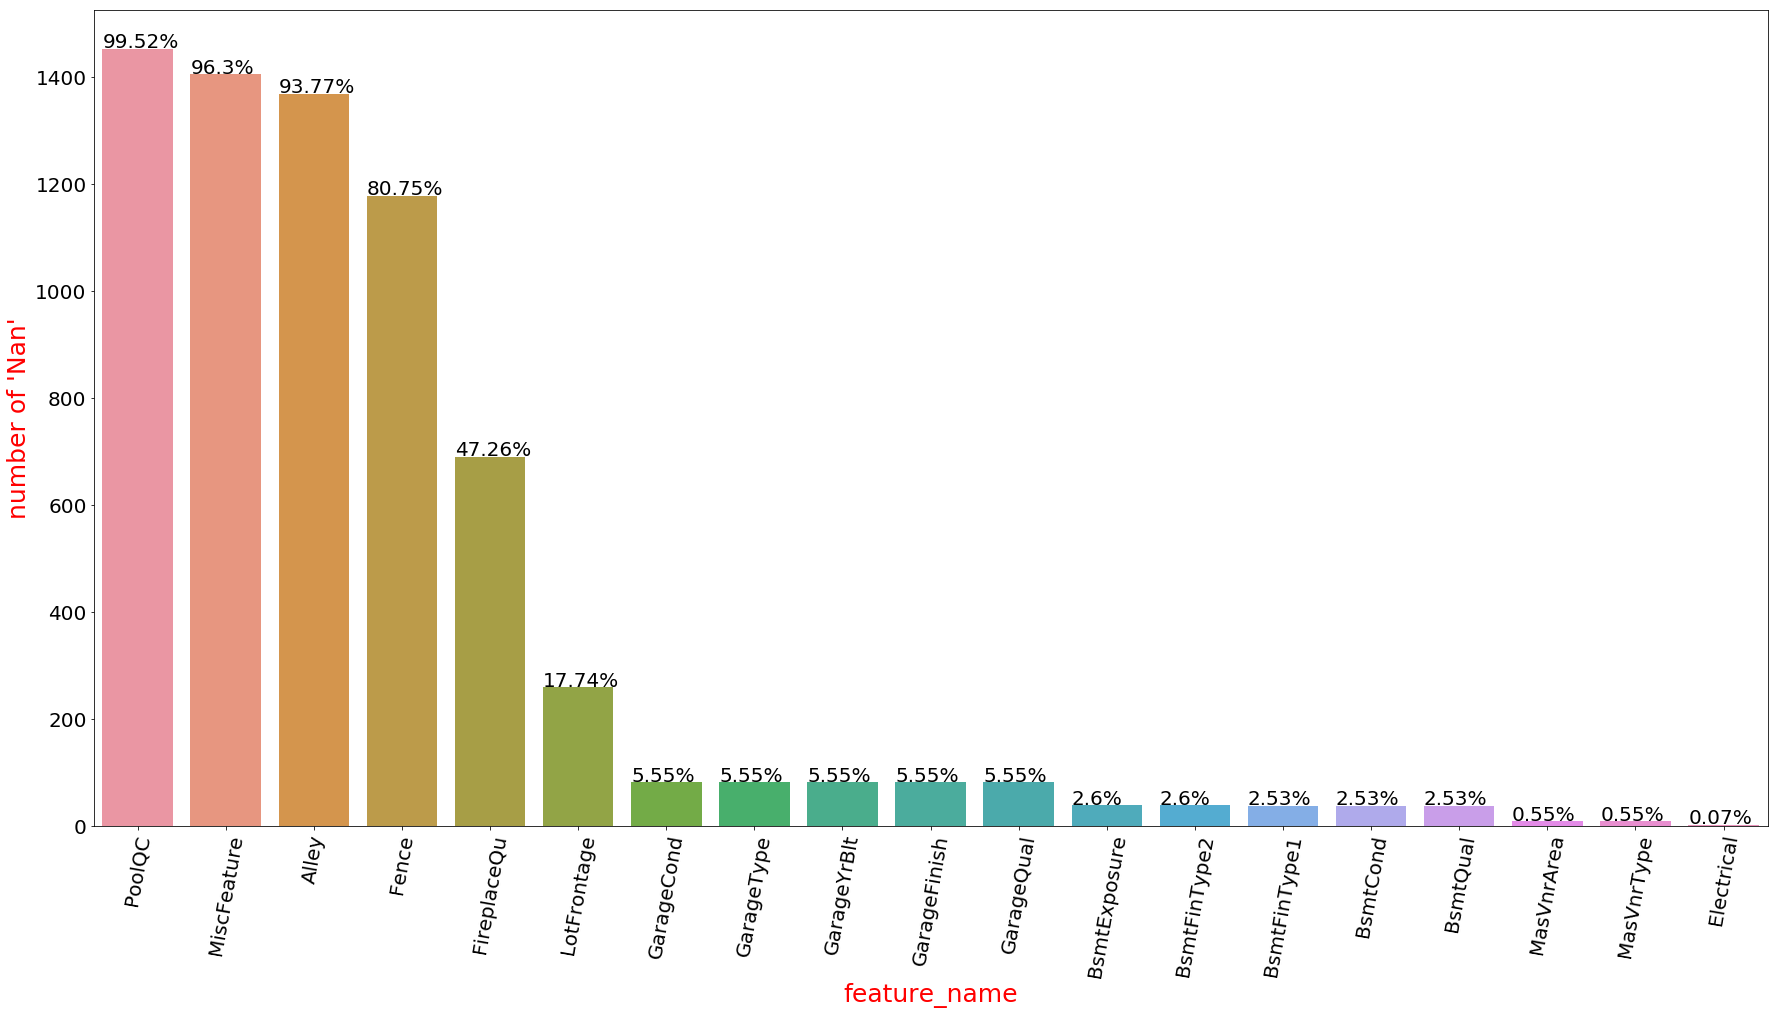

In [11]:
Histogram_NaN_Values(missing_df, real = 'no', size = 20, x_n = 0)
#plt.savefig('Plots/Histogram all NaN.png');

__As we can see from the picture above, there are many features with a lot of missing values. However, not for all of them meaning that the data have been wrongly recorded but means that the houses don't have those things. In particular:__

- PoolQC --> meaning NO Swimming pool
- Alley --> meaning NO Alley access
- MiscFeature --> meaning NO Miscellaneous feature
- Fence --> meaning No fence
- ...


__The once that instead have missing values because of wrong recording are:__

- LotFrontage	
- GarageYrBlt	
- MasVnrArea	

__The picture below shows the 3 features with missing values (TRUE _'NaN'_):__

In [12]:
true_nan = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [13]:
# update the missing_df. missing_df is update with only the features with real missing values.
missing_df = missing_df.loc[missing_df['feature_name'].isin(true_nan)].reset_index()

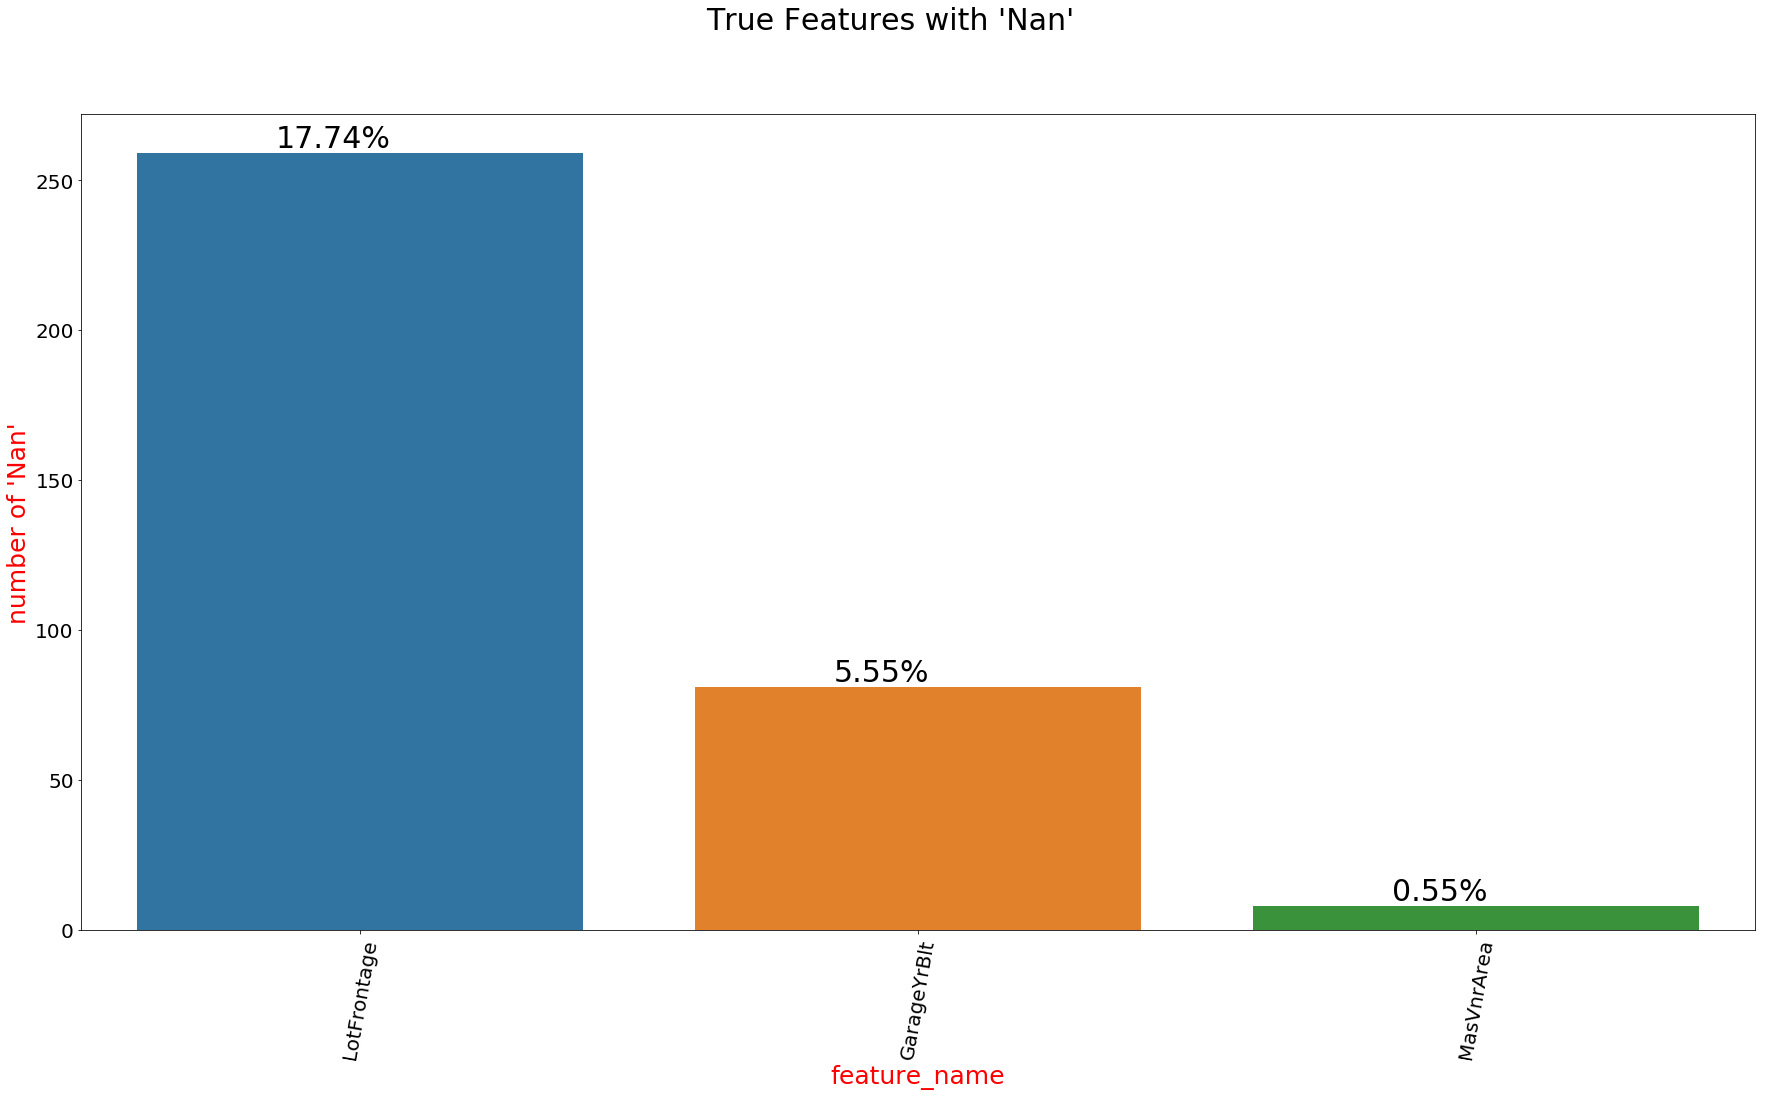

In [14]:
Histogram_NaN_Values(missing_df, real = 'yes', size = 30, x_n = 0.25)
#plt.savefig('Plots/Histogram true NaN.png');

__Because of this, for the first group of feautures we are going to subsitute the _'NaN'_ values with _'NO'_(meaning that these specif houses do not have this characteristic, and for the second group of features we substitute the _'NaN'_ with the _'mean value'_ based on their belonging "neighborhood".__

In [15]:
def fix_nan_function(df, all_nan, true_nan):
    
    for f in all_nan:
        if f not in true_nan: # if the feature is not into the 'true_nan' list, then replace the 'NaN' values with 'NO' 
            df[f].fillna('NO', inplace=True)
            
        else: # fill NaN values by using mean value computed based on the neighborhood
            
            df[f] = df.groupby("Neighborhood")[f].transform(lambda x: x.fillna(x.mean()))
            
    
    #df_train.fillna(df_train.median(), inplace=True) # replace all the remaining 'NaN' values with the 'median' value of the selected feature
    return(df)

In [16]:
df_train = fix_nan_function(df_train, all_nan, true_nan ) # call the function 'fix_nan_function'

In [17]:
del missing_df # delete df
del all_nan # delete list
del true_nan # delete list

In [18]:
df_train.isnull().sum().sum() # check if we still have 'NaN' values. The output should be 0

0

### 1.2.1 Delete outliers

Create a new column with the outliers:

- 'yes' if the sample has 'SalePrice' < 700000 and 'GrLivArea' > 4000.
- 'no' if the two conditions are not satisfied.

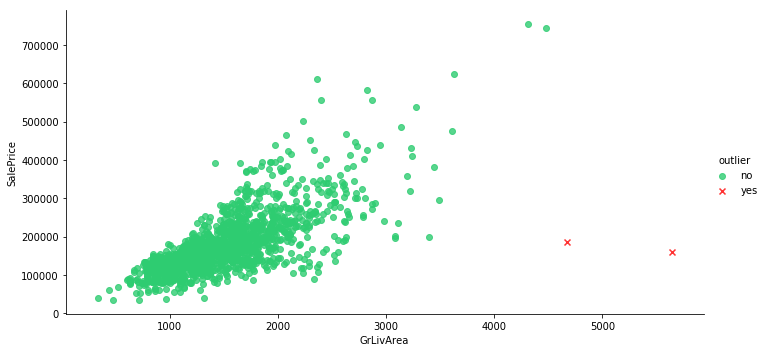

In [19]:
df_train['outlier'] = np.where((df_train['SalePrice']<700000) & (df_train['GrLivArea']>4000), 'yes', 'no') # add new column


ax = sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df_train,
        hue="outlier", fit_reg=False, markers=["o", "x"], palette = ["#2ecc71", "red"],
        aspect=2); # print liearmodel

#plt.savefig('Plots/Outliers.png');

In [20]:
# Drop outliers
df_train.drop(df_train[(df_train.SalePrice < 700000) & (df_train.GrLivArea > 4000)].index, inplace = True)

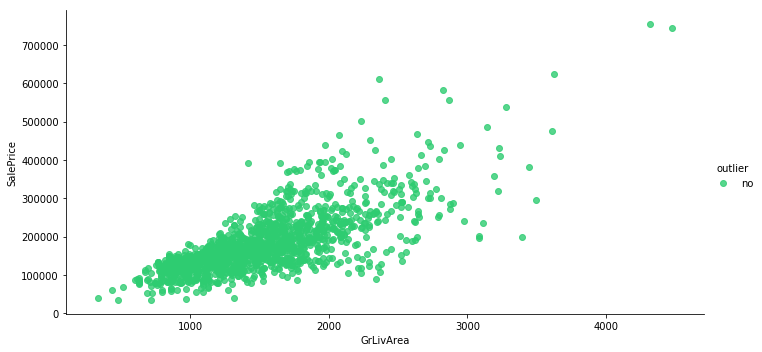

In [21]:
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df_train,
           hue="outlier", fit_reg=False, markers=["o"], palette = ["#2ecc71"],
           aspect=2);
#plt.savefig('Plots/Deleted_Outliers.png');

df_train.drop(['outlier'], axis=1, inplace = True)# drop 'outlier' column

### 1.3 Check distribtion of target features

In [22]:
# Plot a density plot and qq-plot for a selected feature
def qq_plot(df, feature_name): 
    
    df = df[feature_name]
    
    fig = plt.figure(figsize=(20,10))
    
    ax1 = fig.add_subplot(121) # distribution plot
    ax2 = fig.add_subplot(122) # QQ Plot 
    
    #distribution plot
    sns.distplot(df,
                 kde_kws={"color": "g", "lw": 3, "label": "Kernal Density Estimation"},
                 hist_kws={"histtype": "step", "linewidth": 3,
                           "alpha": 1, "color": "b"}, norm_hist = False, ax = ax1); # distribution plot

    
    stats.probplot(df, plot=sns.mpl.pyplot); # QQ Plot

    
    ax1.set_title(str(feature_name)+' Distribution', color='k', fontsize=25)
    ax1.set(xlabel = feature_name)
    ax1.xaxis.labelpad = 20
    ax1.xaxis.label.set_size(20)
    #ax2.set(xlabel='Sale Price')
    ax2.set_title('QQ Plot ' + str(feature_name), color = 'k', fontsize=25)
    ax2.xaxis.labelpad = 20
    ax2.xaxis.label.set_size(20)
    ax2.yaxis.label.set_size(20)
    ax2.get_lines()[0].set_marker('+') # QQ plot markers
    ax2.get_lines()[0].set_markersize(12.0) # QQ plot markers size

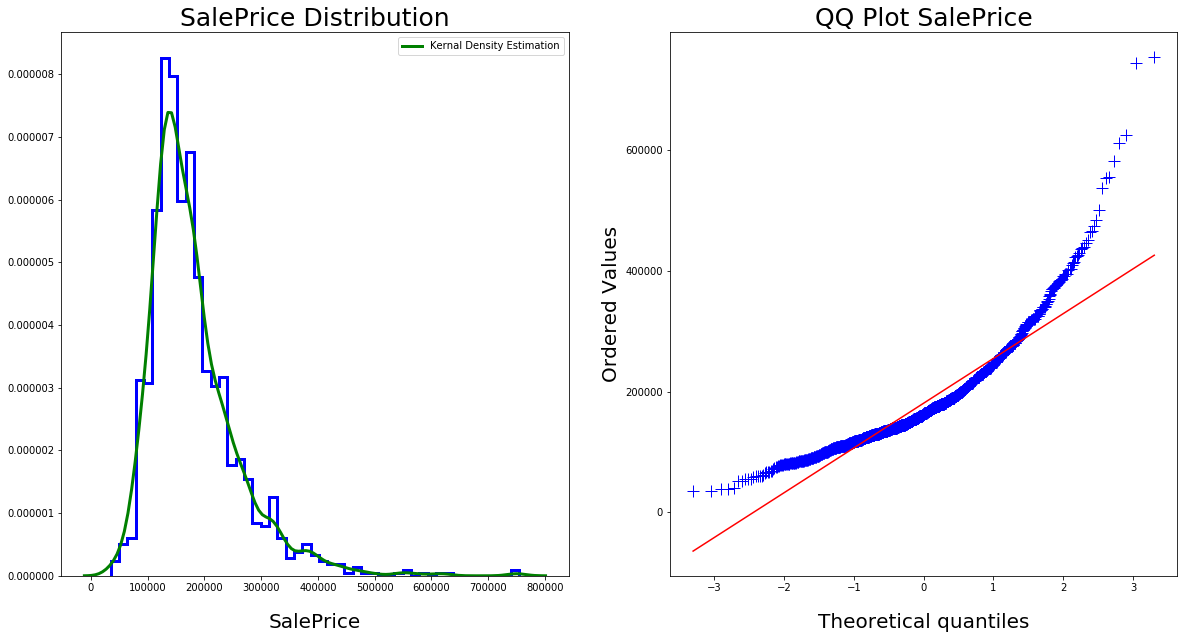

In [23]:
qq_plot(df_train, feature_name = 'SalePrice')
#plt.savefig('Plots/SalePrice qqplot no trasformation.png');

In [24]:
print("SalePrice Skewness: "+str(round(df_train['SalePrice'].skew(),3)),
      "SalePrice Kurtosis: "+str(round(df_train['SalePrice'].kurt(),3)),
      sep='\n')

SalePrice Skewness: 1.881
SalePrice Kurtosis: 6.523


### 1.3.1 Targert transformation


__As it is possible seeing, the target feature doesn't follow a normal distribution and this could reduce the performace of Machine Learning Algorithms. For that reason, different transformation are tried in order to find one that is able to reduce Skewness and Kurtosis.__ 

In [25]:
# 'transformation_function' is a function that execute different transformation on a selected feature.

def transformation_function(df, feature_name):
    
    T_results = defaultdict(list)
    T_df_results = defaultdict()
    
    # ln(x)
    SalePrice_Ln = np.log(df[feature_name]) # function computes the value of ln(x)
    T_results[str(feature_name)+'_Ln'].extend([round(SalePrice_Ln.skew(),4),round(SalePrice_Ln.kurt(),4)]) #compute skewness and kurtosis
    T_df_results[str(feature_name)+'_Ln'] = SalePrice_Ln
       
    #sqrt(x)
    SalePrice_root= np.sqrt(df[str(feature_name)]) # returns the sqrt(x)
    T_results[str(feature_name)+'_root'].extend([round(SalePrice_root.skew(),4),round(SalePrice_root.kurt(),4)]) #compute skewness and kurtosis
    T_df_results[str(feature_name)+'_root'] = SalePrice_root
    
    #cbrt(x)
    SalePrice_croot= np.cbrt(df[str(feature_name)]) # returns the cbrt(x)
    T_results[str(feature_name)+'_croot'].extend([round(SalePrice_croot.skew(),4),round(SalePrice_croot.kurt(),4)]) #compute skewness and kurtosis
    T_df_results[str(feature_name)+'_croot'] = SalePrice_croot
    
    #square(x)
    SalePrice_square= np.square(df[str(feature_name)]) # returns the sqrt(x)
    T_results[str(feature_name)+'_square'].extend([round(SalePrice_square.skew(),4),round(SalePrice_square.kurt(),4)]) #compute skewness and kurtosis
    T_df_results[str(feature_name)+'_square'] = SalePrice_square
    
    return (T_results, T_df_results)


In [26]:
# Function that plot distribution of a particoular feature after 'transformation_function'
def Skewness_Kurtosis_Plots(df, feature_name):
    
    T_results, T_df_results = transformation_function(df, feature_name)
    
    colors = ['darkorange', 'dodgerblue', 'seagreen', 'mediumvioletred', 'darkslategray', 'maroon']
    key_list = [k for k in T_results.keys()] # list with all the SalePrice transformation
    
    fig = plt.figure(figsize=(20,15))
    
    if feature_name == 'SalePrice':
        fig.suptitle('Target Transformation Distribution', fontsize=25)
    else:
        fig.suptitle(feature_name+' Transformation Distribution', fontsize=25)

    for n, k in enumerate(key_list):
        try:# because if there are 0 it is not possible compute the log
            ax = fig.add_subplot(2,2, (n+1))
            sns.distplot(T_df_results[k], color=colors[n], kde_kws={"label": "Kernal Density Estimation"})
            ax.set_title(k.split("_")[1]+', Skewness: '+str(T_results[k][0])+' Kurtosis: '+str(T_results[k][1]), color='Red', fontsize=20)
            ax.set(xlabel = k.split("_")[1]+str(feature_name))
            ax.xaxis.labelpad = 10
            ax.xaxis.label.set_size(15)
        except:
            continue

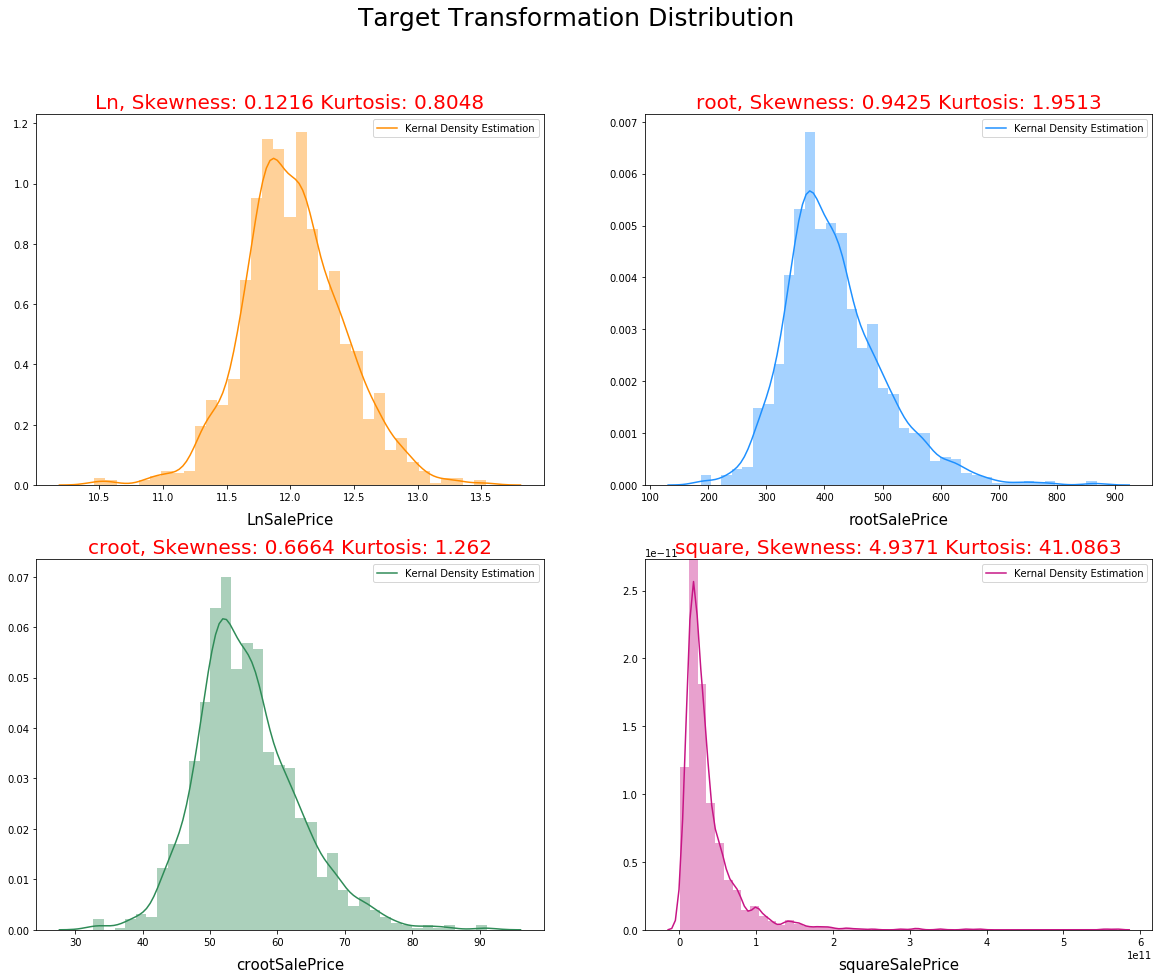

In [27]:
Skewness_Kurtosis_Plots(df_train, feature_name='SalePrice')
#plt.savefig('Plots/SalePrice trasformations.png');

### 1.3.2 Target Transformation

__The picture above shows how the natural logarithm can imporve the Skewness and Kurtosis of the target feature.
For that reason a new column called 'SalePrice_Ln' is added to df_train. This new column contains the natural logathm of the SalePrice values.__

In [28]:
df_train['SalePrice_Ln'] = np.log(df_train['SalePrice']) #add a new column with the SalePrice_Log

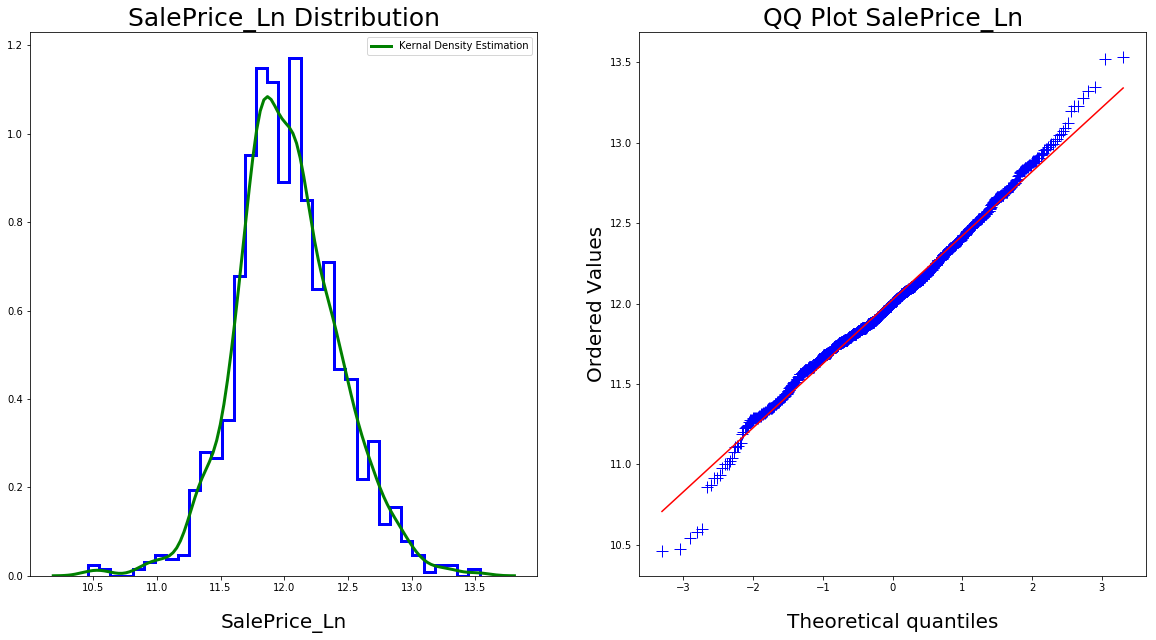

In [29]:
qq_plot(df_train, feature_name = 'SalePrice_Ln')
#plt.savefig('Plots/SalePrice qqplot YES trasformation.png');

In [30]:
print("SalePrice Skewness: "+str(round(df_train['SalePrice_Ln'].skew(),3)),
      "SalePrice Kurtosis: "+str(round(df_train['SalePrice_Ln'].kurt(),3)),
      sep='\n')

SalePrice Skewness: 0.122
SalePrice Kurtosis: 0.805


### 1.4 Numerical Features Selection and Cleaning

In [31]:
# 'Skewness_and_Kurtosis_num' is a function that compute Skewness and Kurtosis on the selected features. (In this case Numerical)
def Skewness_and_Kurtosis_num (df_train, numerical_features):

    numerical_S_and_K = defaultdict() # dictionary where--> 'Feature Name': [Skewness, Kurtosis]
    for f in numerical_features:
        numerical_S_and_K[f]= [round(df_train[f].skew(),3), round(df_train[f].kurt(),3)] # compute Skewness and Kurtosis

    df = pd.DataFrame.from_dict(numerical_S_and_K, orient='index',columns = ['Skewness', 'Kurtosis']) # convert dictionary into df
    return (df)    
    

In [32]:
# DataFrame of Skweness and and Kurtosis for numerical features
df_numerical_S_and_K = Skewness_and_Kurtosis_num(df_train, numerical_features)

__'pearson_numerical' function computes the pearson correlation coefficent for all the numerical variables.<br>
The function returns the features with a correlation coefficent greater than 0.5 and a p-value less then 5%.__

In [33]:
def pearson_numerical(df_train):
    # features that we don't want to include in the pearson correlation computation
    irrelevant_features = ['Id', 'SalePrice', 'SalePrice_Ln'] 

    #dictionary where --> 'Feature Name': [Pearson, p-value]
    numerical_corr = {f: pearsonr(df_train['SalePrice'], df_train[f]) 
                      for f in numerical_features 
                      if f not in irrelevant_features}

    # save all the features that have p-value < 5% and Pearson correaltion coefficent > 0.4
    numerical_corr_selected = {k: [round(v[0],3),v[1]] for k,v in numerical_corr.items() if v[1] < 0.05 and v[0] > 0.5}
    
    R2 = [[k, round((v[0]**2)*100,3)] for k,v in numerical_corr_selected.items()] # compute the R^2
    
    return(numerical_corr_selected, R2)



In [34]:
relevant_numerical_corr, R2_numerical = pearson_numerical(df_train)

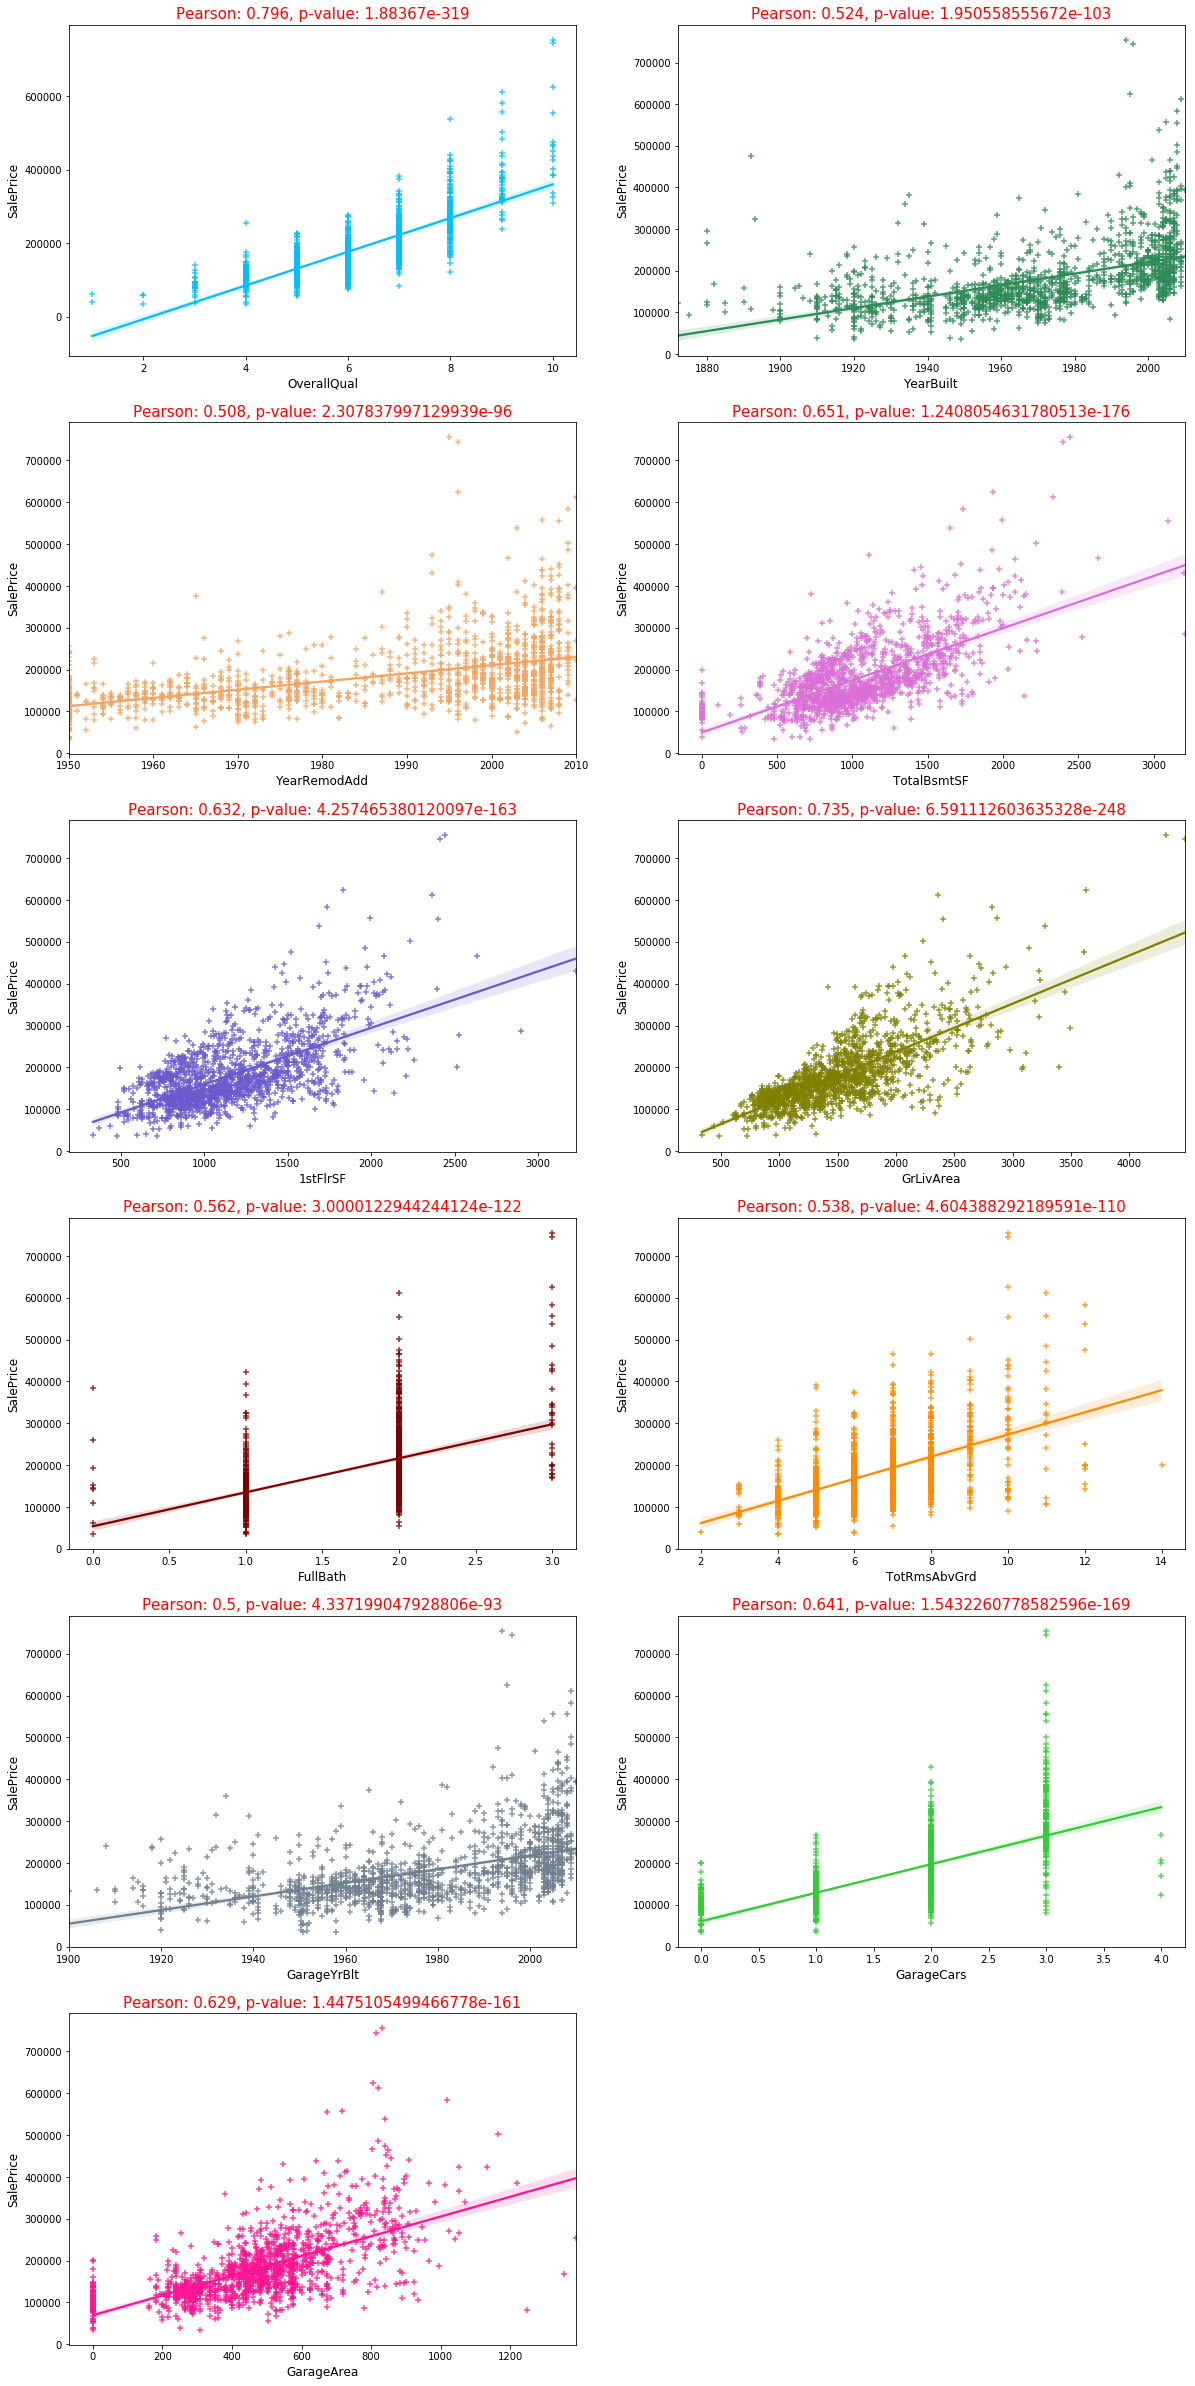

In [35]:
# Plot Pearson correlation coefficent for relevant Numerical Features

fig = plt.figure(figsize=(20,50))
colors = ['deepskyblue', 'seagreen', 'sandybrown', 'orchid', 'slateblue', 'olive', 'maroon', 'darkorange', 'slategrey', 'limegreen', 'deeppink', 'aquamarine', 'tomato','blue']
for e, (k,v) in enumerate(relevant_numerical_corr.items()):
    ax = fig.add_subplot(7, 2, (e+1))
    sns.regplot(df_train[k], df_train['SalePrice'], marker = "+", color = colors[e]) # compute regression plot per each numerical selected feature
    ax.set_title('Pearson: '+str(round(v[0],3))+', p-value: '+str(v[1]), color='r', fontsize=15)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
#plt.savefig('Plots/numerical correlation plot.png');  

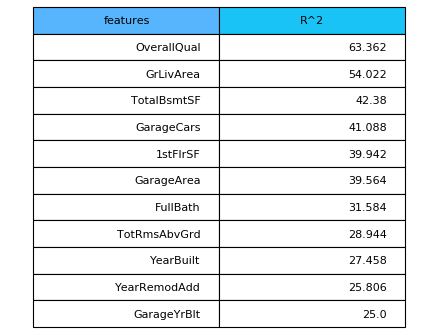

In [36]:
def sort_fun(lista): # function to sort 'R2_numerical'
    lista.sort(key = lambda x: x[1], reverse=True) 
    return lista


# Print R^2 for numerical features:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table = ax.table(cellText=sort_fun(R2_numerical), colLabels=['features','R^2'], loc='center')
table[(0, 0)].set_facecolor("#56b5fd")
table[(0, 1)].set_facecolor("#1ac3f5")
table.set_fontsize(10)
table.scale(1,2)
ax.axis('off');

#plt.savefig('Plots/R2 numerical features_0.5.png')

### 1.4.1 _'train'_ dataset definition 

__Create a new DataFrame called 'train' where we are going to store all the selected numerica features + the SalePrice_Ln__

In [37]:
# function to print a corr matrix for most relevant 'numerical features'

def Corr_matrix_plot(df, size_num, labelsize):
    
    corr = df.corr()
    
    # plot the figure
    fig = plt.figure(figsize = (15,10))
    plt.title('Numerical_Corr_Matrix', y=1.01, fontsize=20, color='r')
    ax = fig.add_subplot(111)
    sns.heatmap(corr,  cmap= 'YlGnBu', annot=True, annot_kws={"size": size_num}, linewidth=3, ax =ax);
    ax.tick_params(axis='both', which='major', labelsize=labelsize)


    ax.plot()


In [38]:
train = df_train[[f for f in relevant_numerical_corr.keys()]]
train['SalePrice_Ln'] = df_train['SalePrice_Ln'] # add also 'SalePrice_Ln'

del relevant_numerical_corr
del R2_numerical

__It is possible seeing, from the figure above, how these features are high correlated with the _'Target Feature'_. Below are reported the 11 more relevant numerical features with their Pearson correlation coefficents and the p-values:__

1. OverallQual ---> Pearson = 0.796, p-value ≈ 0. 
    
- YearBuilt ---> Pearson = 0.524, p-value ≈ 0.
    
- YearRemodAdd ---> Pearson = 0.508, p-value ≈ 0.
    
- TotalBsmtSF ---> Pearson = 0.651, p-value ≈ 0.
    
- 1stFlrSF ---> Pearson = 0.632, p-value ≈ 0.
    
- GrLivArea ---> Pearson = 0.735, p-value ≈ 0.
    
- FullBath ---> Pearson = 0.562, p-value ≈ 0.
    
- TotRmsAbvGrd ---> Pearson = 0.538, p-value ≈ 0.
    
- GarageYrBlt ---> Pearson = 0.500, p-value ≈ 0.
    
- GarageCars ---> Pearson = 0.641, p-value ≈ 0.
    
- GarageArea ---> Pearson = 0.629, p-value ≈ 0.

__Below a confusion matrix showing the correlation between the selected variables and the _'target feature'_:__

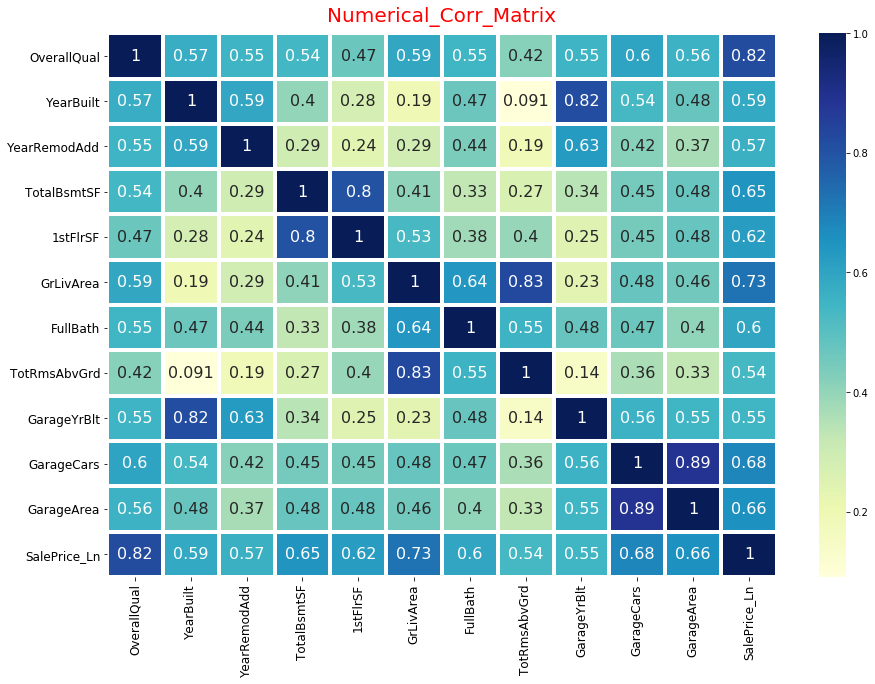

In [39]:
Corr_matrix_plot(train, size_num = 16, labelsize=12)
#plt.savefig('Plots/numerical correlation matrix.png');  

### 1.4.2 Delete high correlated features


- '1stFlrSF' is strongly correlated (0.8) with 'TotalBsmtSF'. For that reason we decide to delete '1stFlrSF' because it has a lower correlation with the 'SalePrice' feature.

- 'GarageYrBlt' is strongly correlated (0.82) with 'YearBuilt'. For that reason we decide to delete 'GarageYrBlt' because it has a lower correlation with the 'SalePrice' feature.

- 'TotRmsAbvGrd' is strongly correlated (0.83) with 'GrLivArea'. For that reason we decide to delete 'TotRmsAbvGrd' because it has a lower correlation with the 'SalePrice' feature.

- 'GarageCars' is strongly correlated (0.89) with 'GarageArea'. For that reason we decide to delete 'GarageArea' because it has a lower correlation with the 'SalePrice' feature.

In [40]:
train.drop(['1stFlrSF', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace = True)

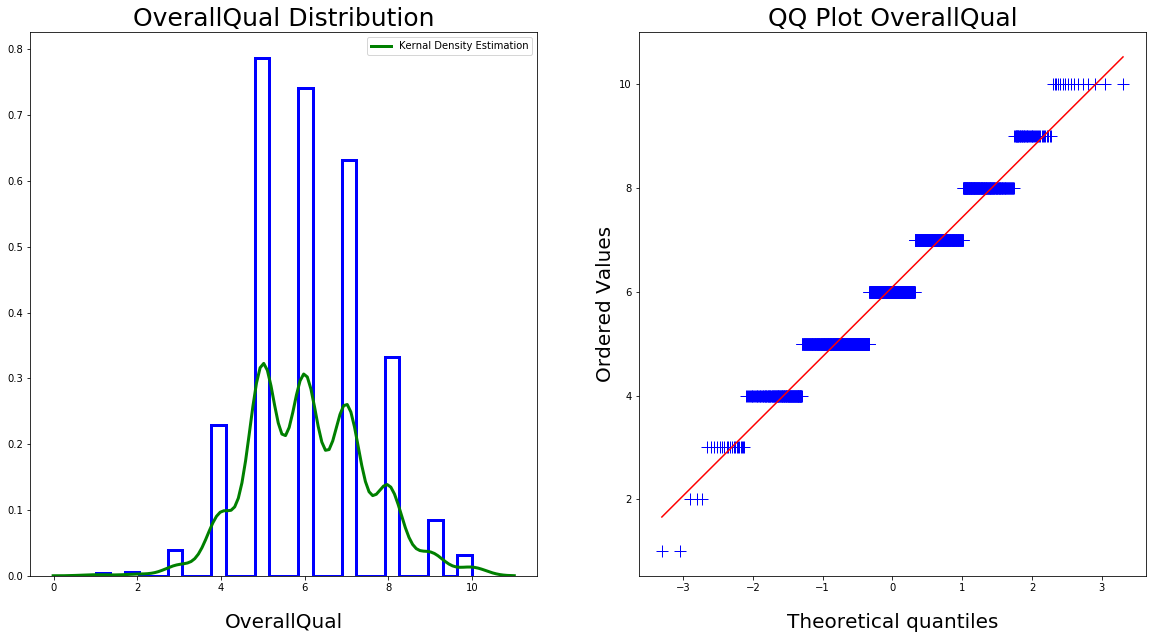

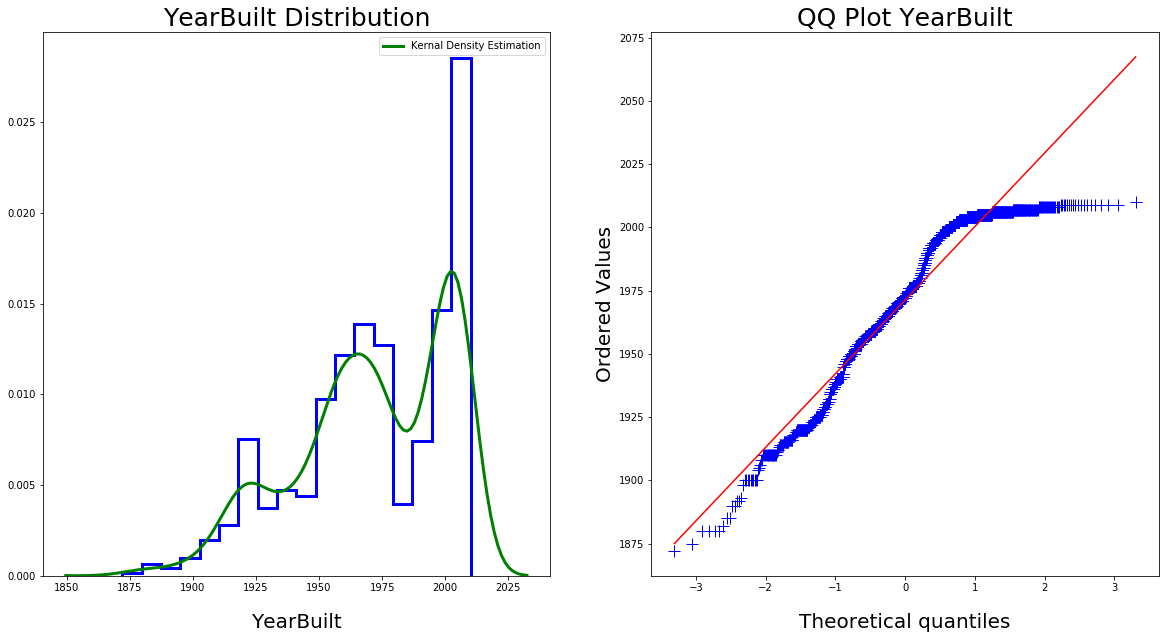

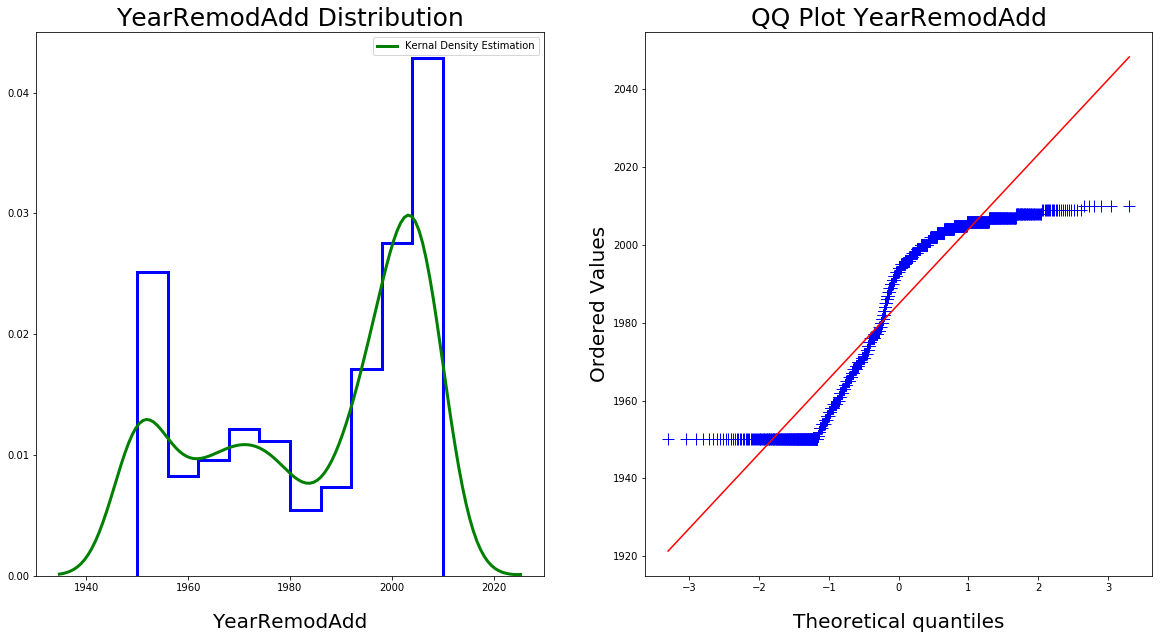

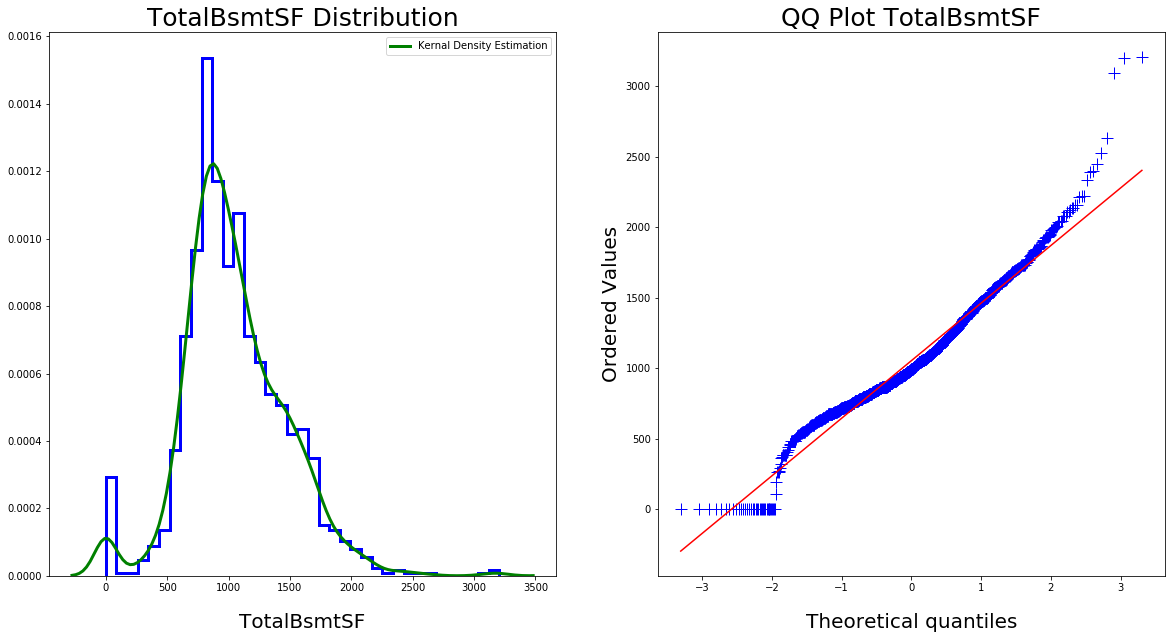

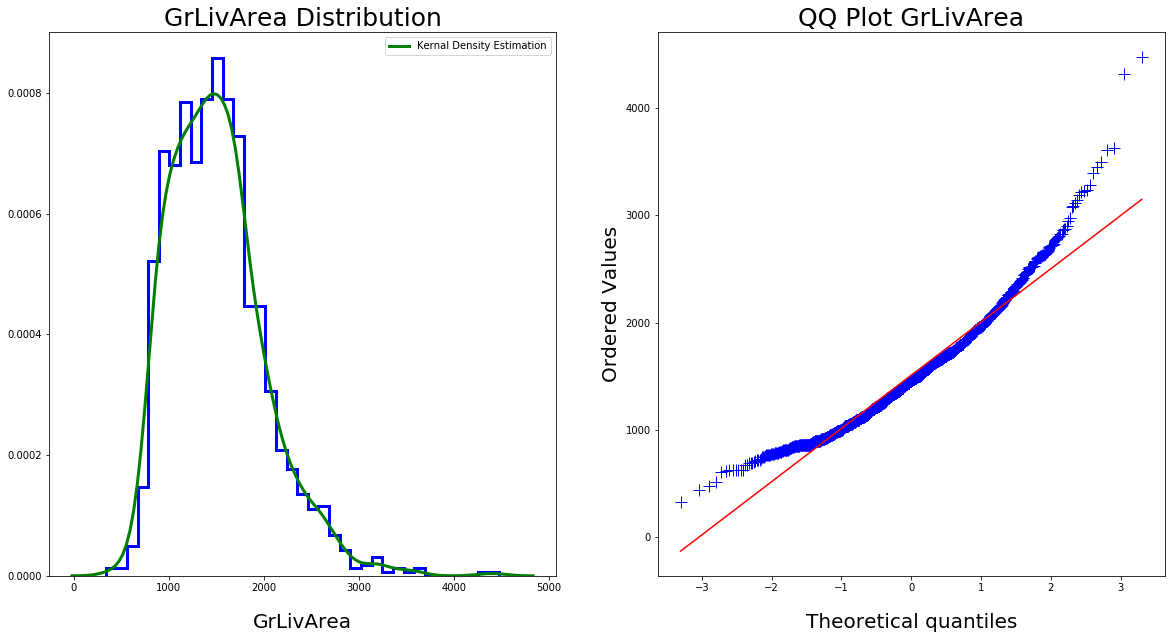

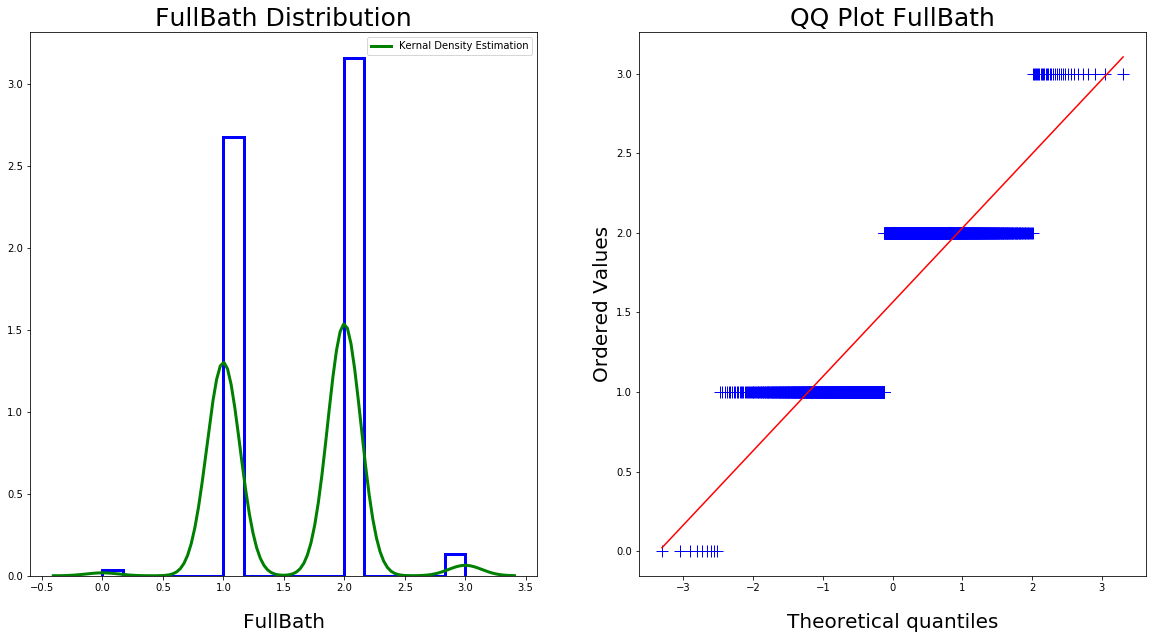

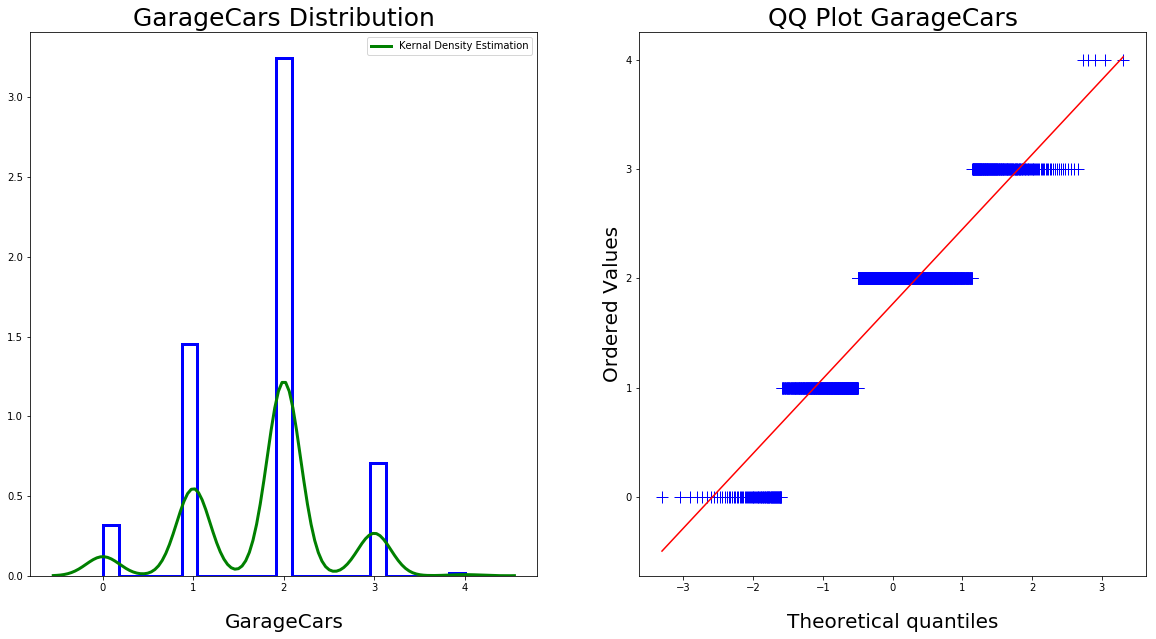

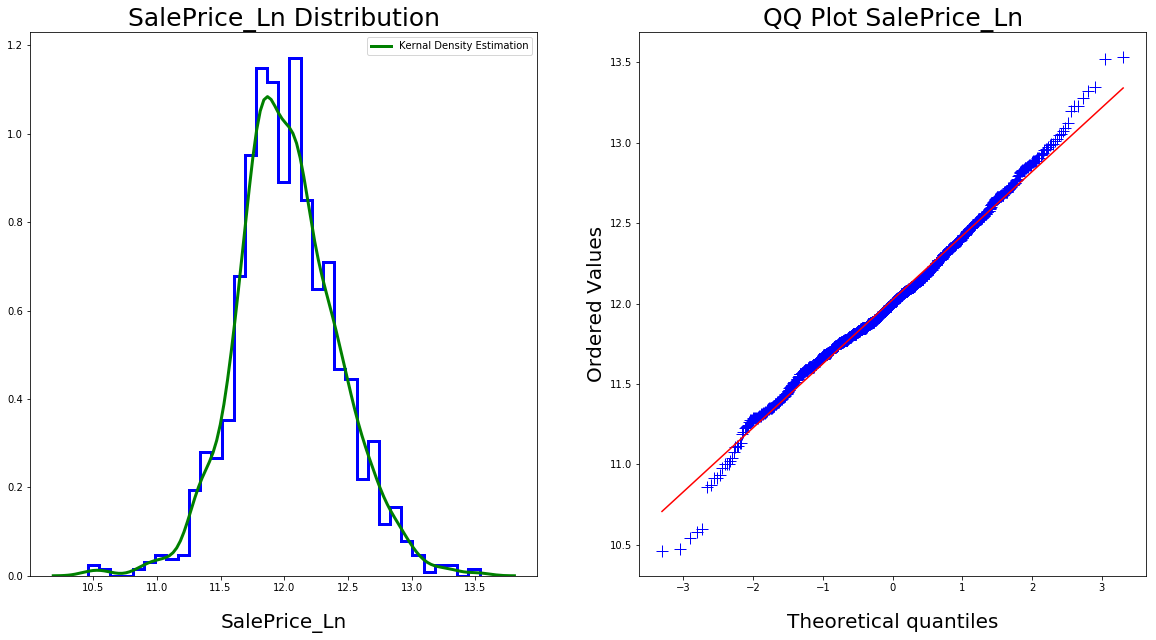

In [41]:
# Plot qq-plot per each numerical variable

for f in train.columns.tolist():
    qq_plot(df_train, feature_name = f)

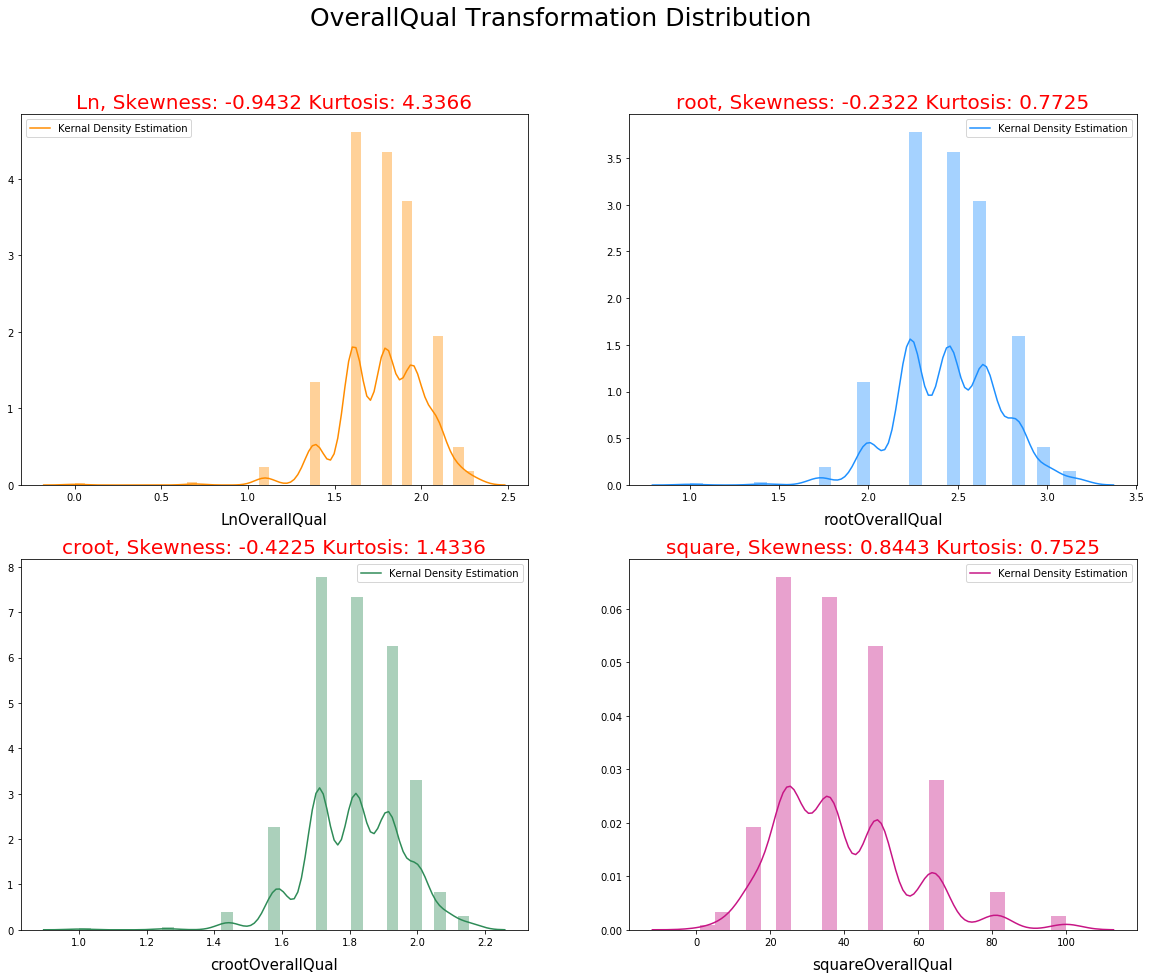

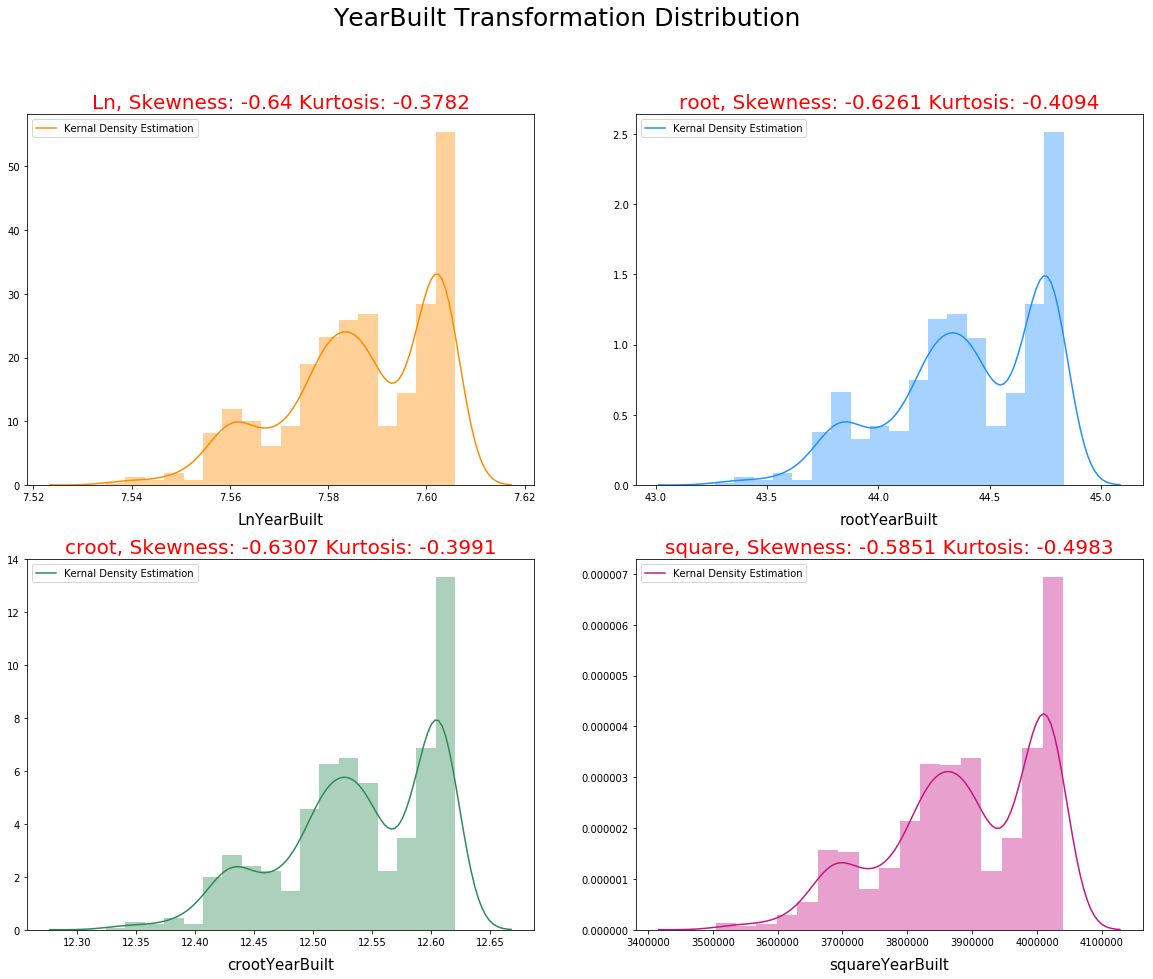

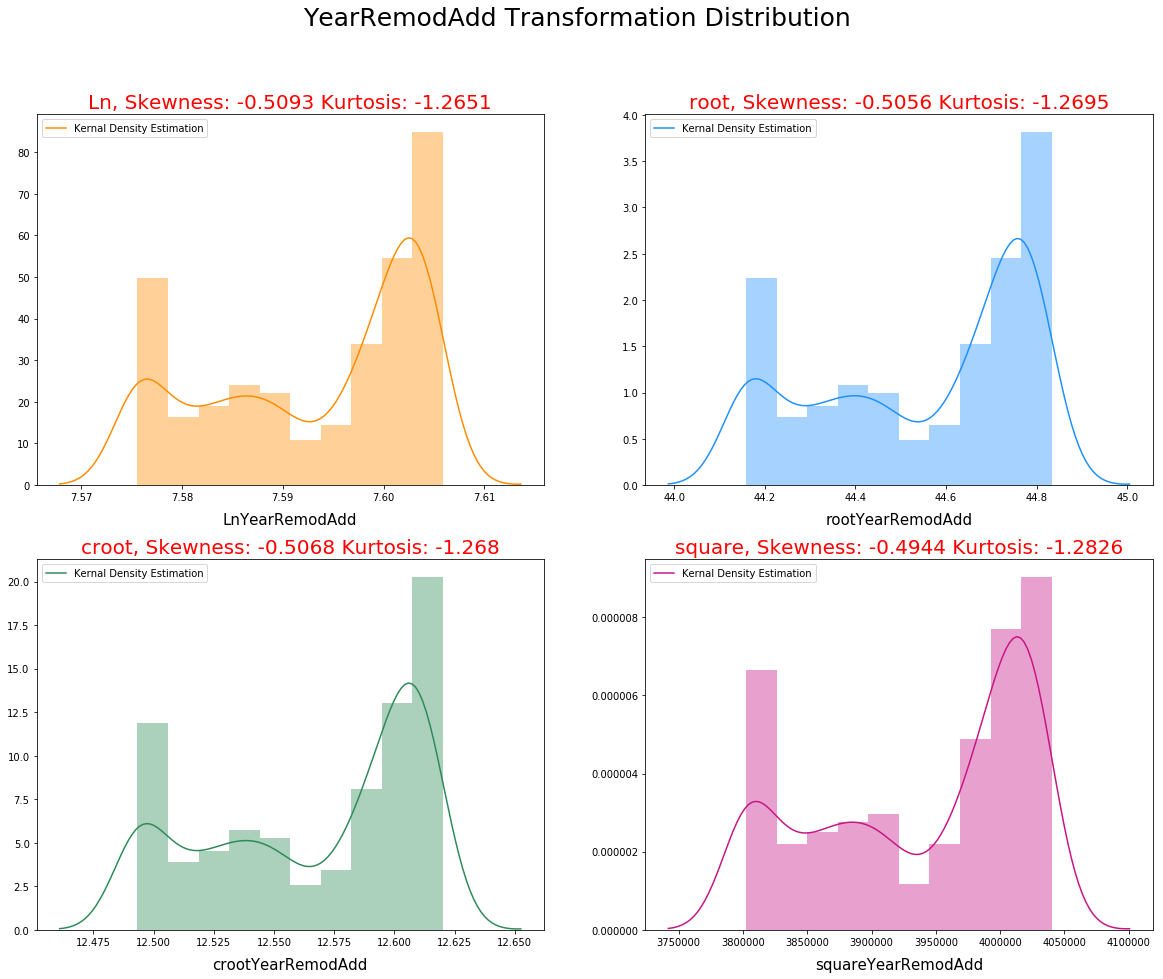

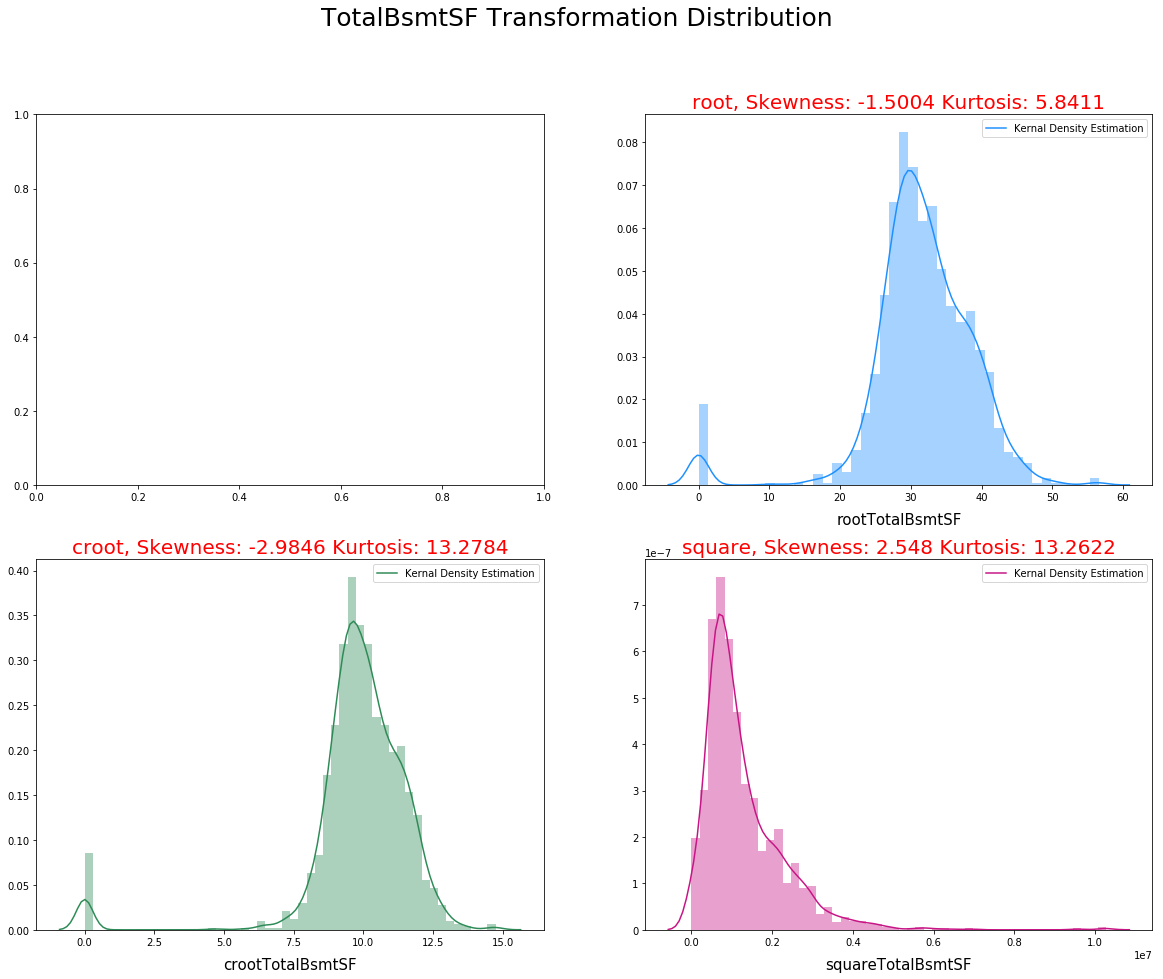

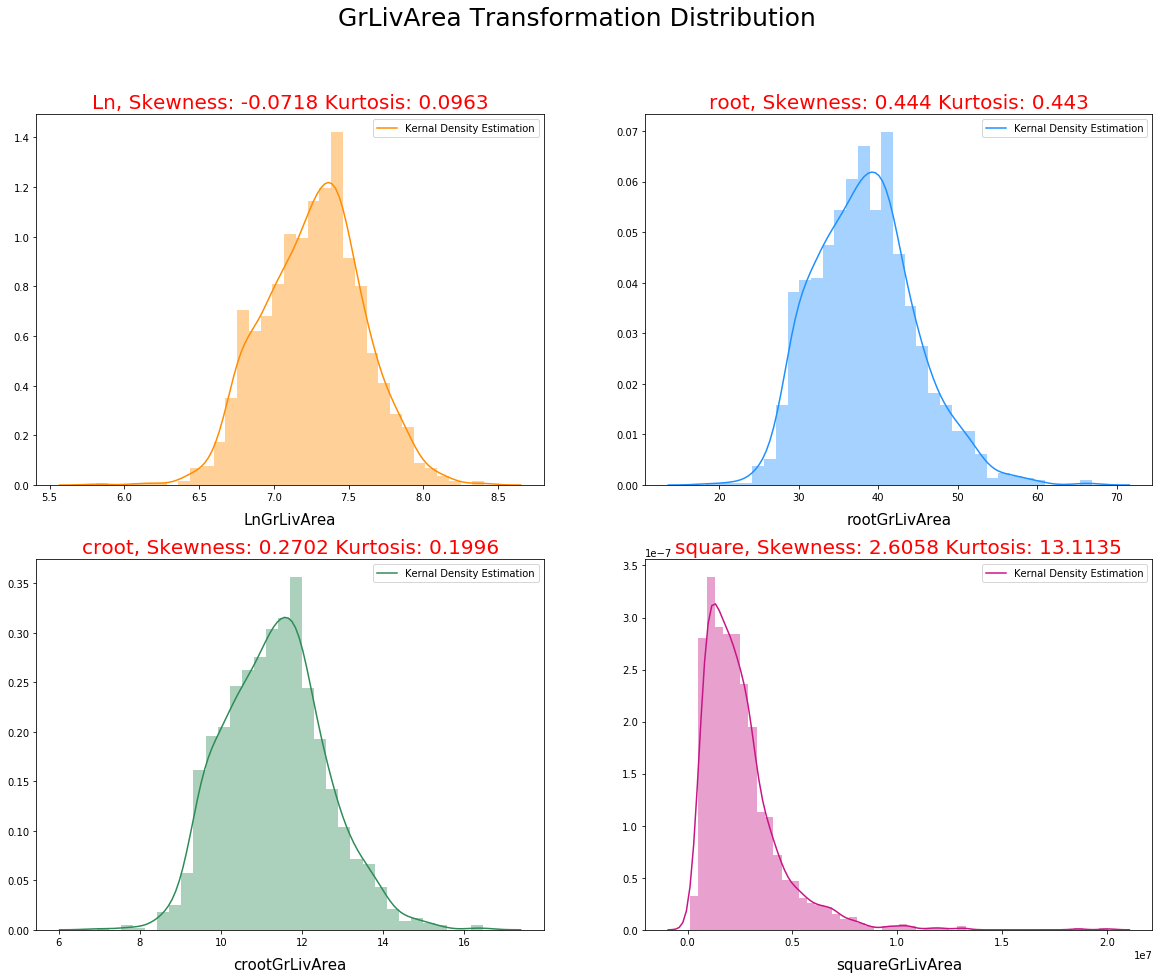

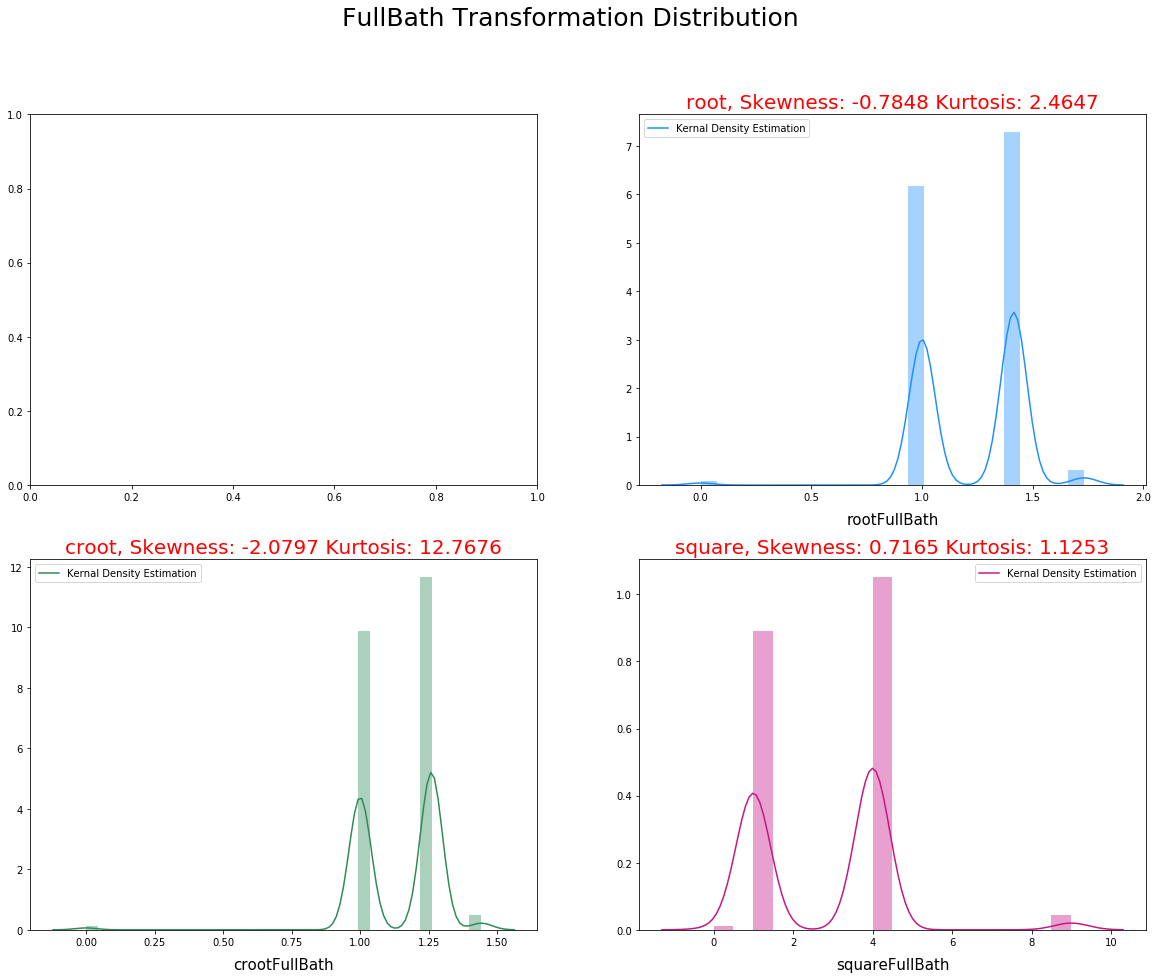

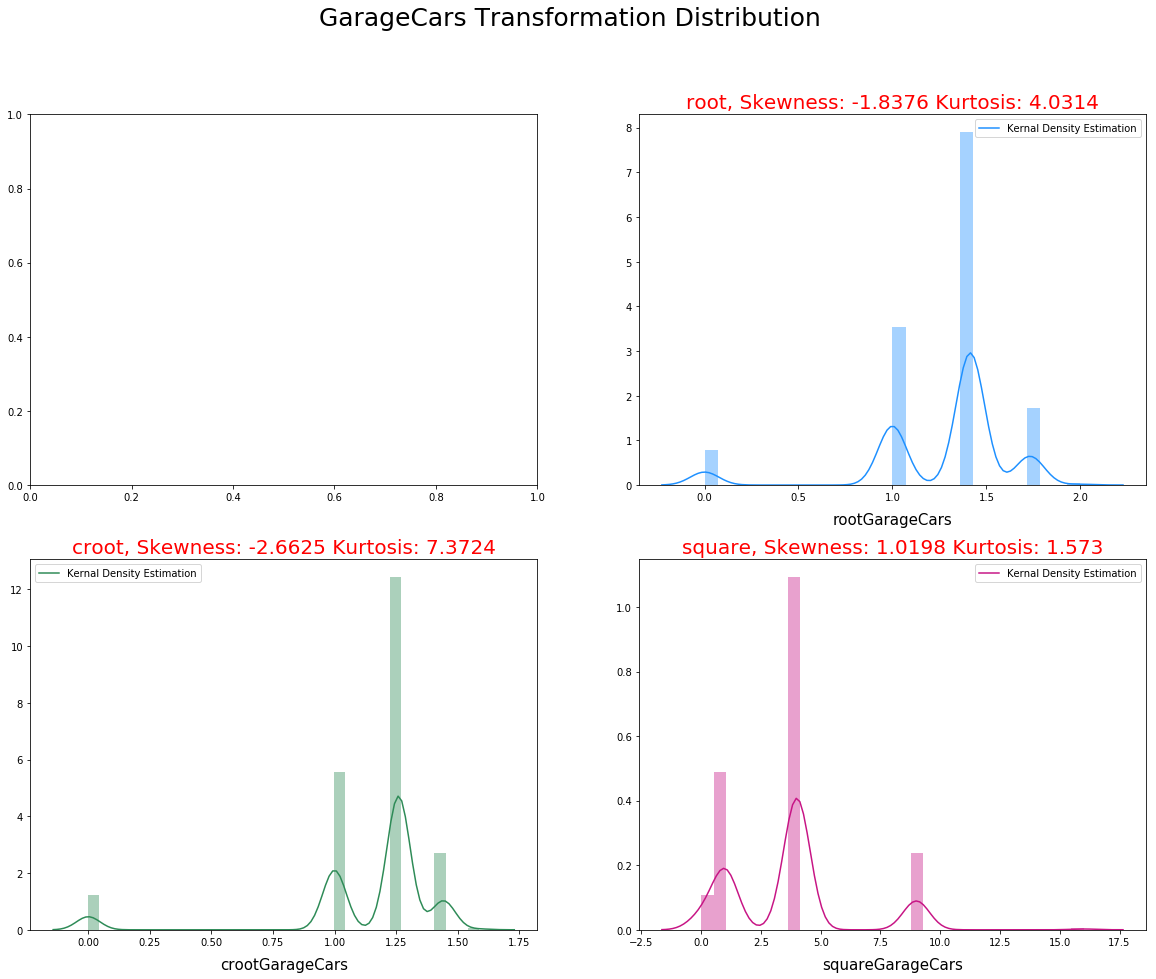

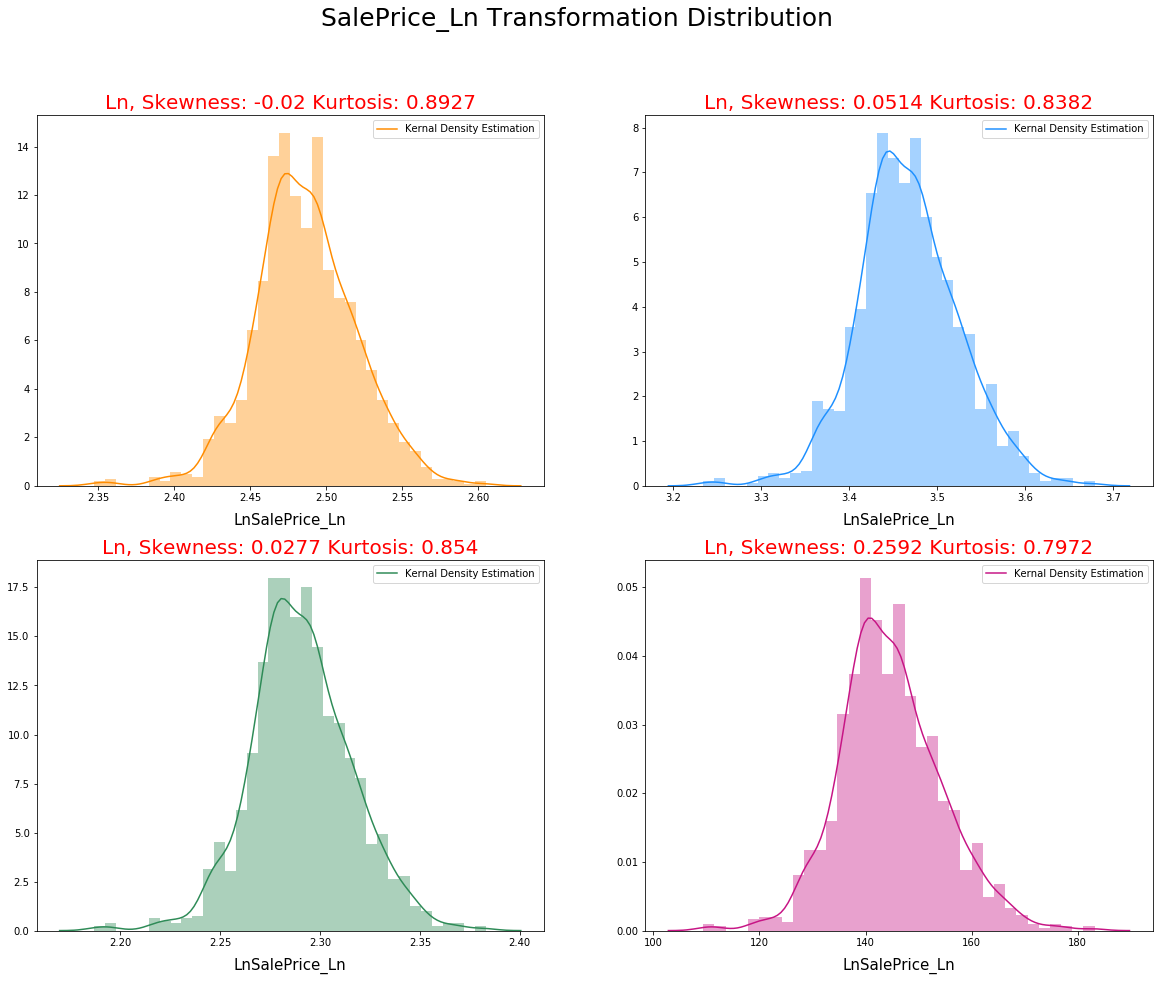

In [42]:
# Plot Skewness_Kurtosis per each numerical feature after 4 transformations

for f in train.columns:
    Skewness_Kurtosis_Plots(train, f)

### 1.4.3 numerical features transformation 

__Now, it is necessary checking the distribution of all the selected numerical features. To do that, skewness and Kortosis are compute on all the 7 features __

In [43]:
def check_transformation(df, features):

## COMPUTE AND DISPLAY TWO DATAFRAMES WHERE:
# (1) s_k_before_transf => Dataframe with Skewness and Kurtosis of numerical features before transformations
# (2) num_s_k => Dataframe with Skewness and Kurtosis of numerical features after transformations (log, sqrt, )


    df_num_list = []
    for k in features:

        dizi, df12 = transformation_function(df, k) # call the 'transofrmation_function' 
        df_num_list.append(pd.DataFrame.from_dict(dizi, orient='index')) # append the dictionary per each feature with all the transofrmation and transform it into df


    s_k_before_transf = Skewness_and_Kurtosis_num(df, features).reset_index() # call the 'Skewness_and_Kurtosis_num' function to return the skewness and kurtosis before the transformation
    s_k_before_transf.columns = ['feature_name','Skewness','Kurtosis']
    num_s_k = pd.concat(df_num_list)
    del df_num_list
    num_s_k = num_s_k.reset_index() # reset the index in order to have numbers instead of features names    
    num_s_k.columns = ['feature_name','Skewness','Kurtosis'] # rename the columns 

    display(s_k_before_transf)
    display(num_s_k)

__Taking a look at the table displayed above, it is clear how these 4 features can benefit of a logarithm transformation: <br>
<br>
'GrLivArea', 'TotalBsmtSF', 'FullBath' and 'GarageCars'__

In [44]:
# the function apply the transformation on selected the categorical features 
def numerical_transformation(df):
    
    # ln transformation on GrLivArea
    df['GrLivArea_ln'] = np.log(df['GrLivArea'])
    df.drop(['GrLivArea'], axis=1, inplace = True)


    # apply ln transformation only on data that have TotalBsmtSF > 0.
    df.loc[df['TotalBsmtSF'] > 0, 'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
    df.rename(columns={'TotalBsmtSF':'TotalBsmtSF_ln'}, inplace=True)



    df.loc[df['FullBath'] > 0, 'FullBath'] = np.log(df['FullBath'])
    df.rename(columns={'FullBath':'FullBath_ln'}, inplace=True)

    df.loc[df['GarageCars'] > 0, 'GarageCars'] = np.log(df['GarageCars'])
    df.rename(columns={'GarageCars':'GarageCars_ln'}, inplace=True)

    return(df)

In [45]:
train = numerical_transformation(train)

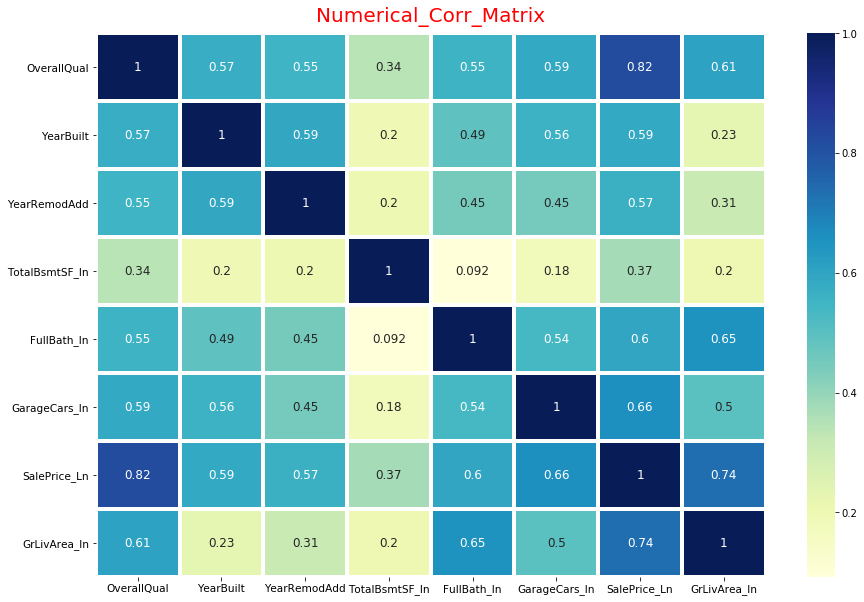

In [46]:
Corr_matrix_plot(train, size_num = 12, labelsize=10.5)

### 1.5 Categorical Features Cleaning and Selection

In [47]:
# box-plots per each categorical feature based on the 'SalePrice' target feature
def Box_Plot_function(df, lista, rows, cols):
        
    fig = plt.figure(figsize=(25,90))
    #colors = ['deepskyblue', 'seagreen', 'sandybrown', 'orchid', 'slateblue', 'olive', 'maroon', 'darkorange', 'slategrey', 'limegreen', 'deeppink', 'aquamarine', 'tomato']
    for e, v in enumerate(lista):
        ax = fig.add_subplot(rows, cols, (e+1))
        sns.boxplot(x = 'SalePrice', y = v, orient = "h", data = df)
        sns.swarmplot(x = 'SalePrice', y = v, data = df, color = ".15")
        #ax.set_title(str(v), color='r', fontsize=15)
        #ax.xaxis.label.set_size(12)
        ax.tick_params(labelsize=15)
        ax.yaxis.label.set_size(20)
        ax.set_xlabel('') 
        ax.set_xticks([])

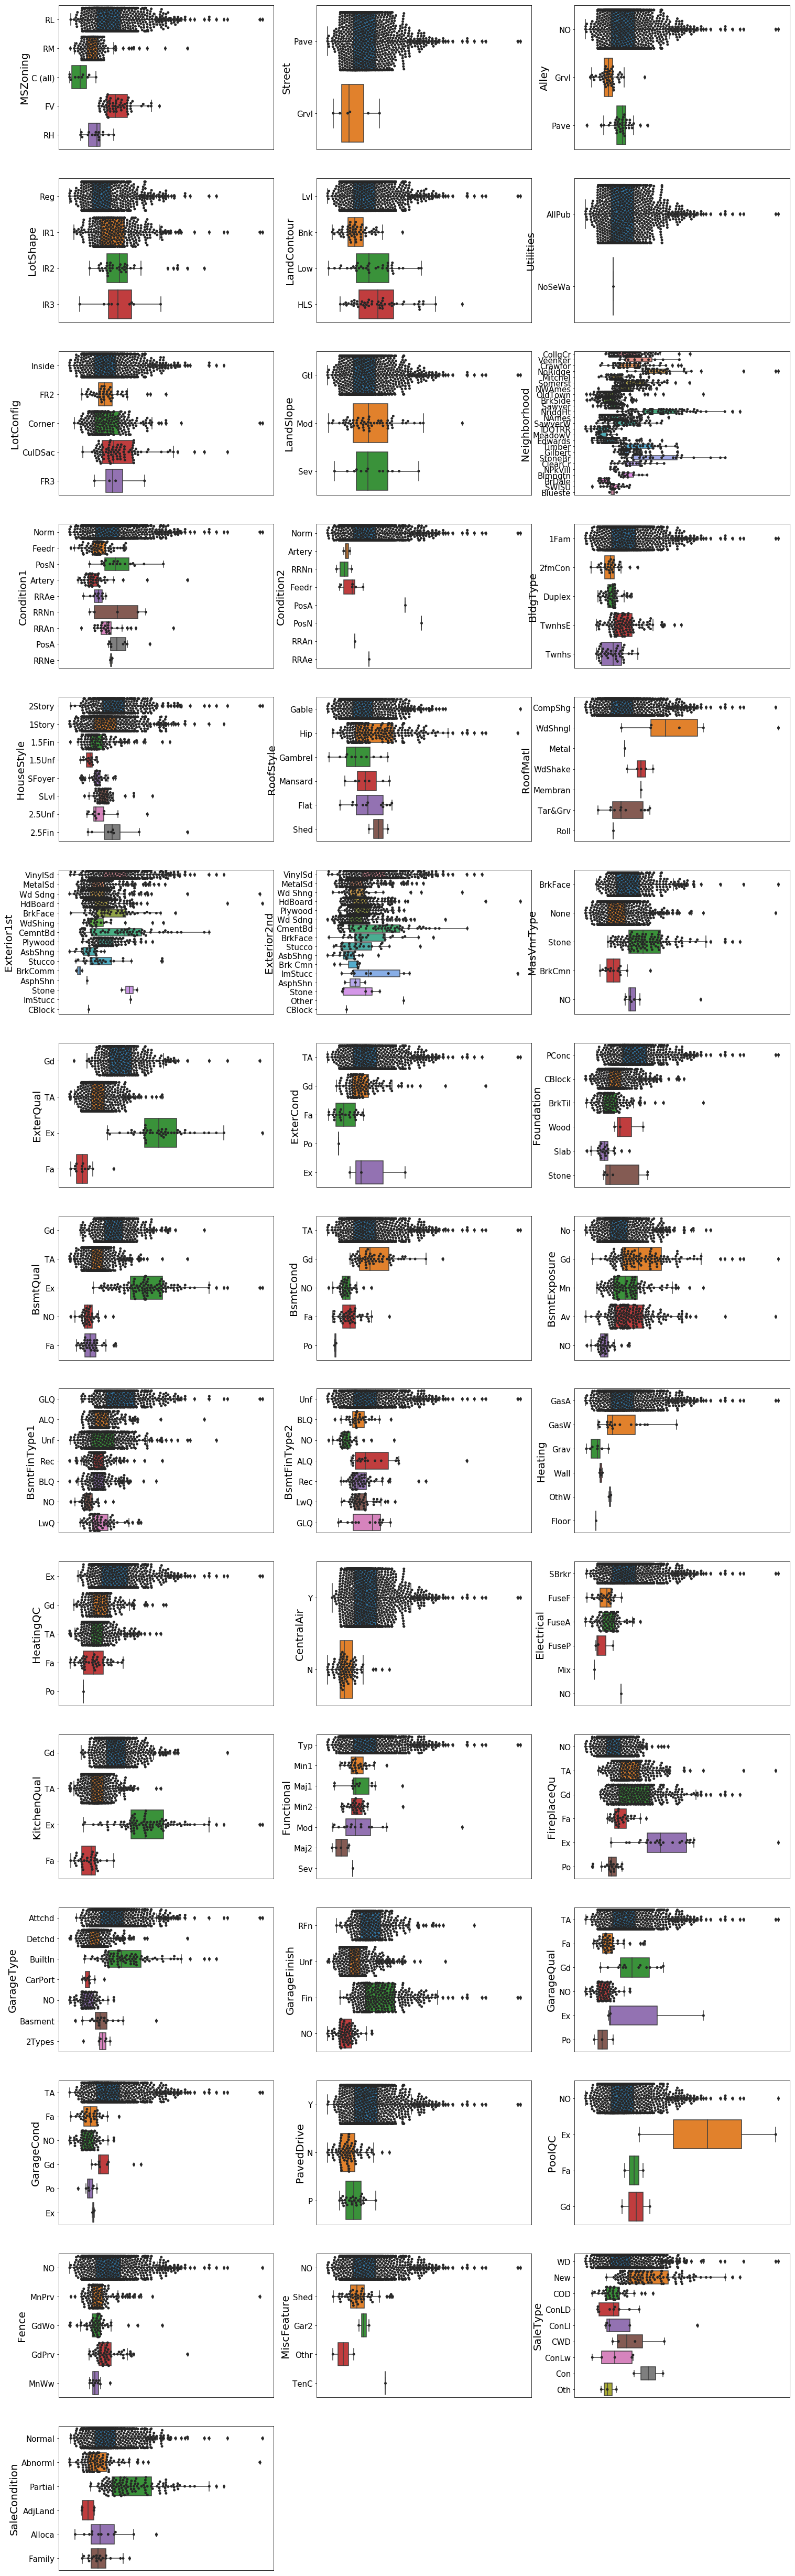

In [48]:
Box_Plot_function(df_train, categorical_features,15, 3)

### 1.5.1 ANOVA

__A good approach to perform Analysis of variance is to group the continuous variable (SalePrice) using the classes present into every categorical variable and compute the variances of every class. The variances computed are compared with the overall variance. If the variances ,after grouping, fall down significantly, it means that the categorical variable can explain most of the variance of the continuous variable meaning that the observed variable is highly significant. If the variables have no correlation, then the variance in the groups is expected to be similar to the original variance.__

- https://newonlinecourses.science.psu.edu/stat501/lesson/12/12.3 

In [49]:
# COMPUTE THE VARIANCE OF 'SalePrice' GROUPED BY CATEGORY PER EACH CATEGORICAL FEATURES AND RETURNS THE ONCE WHERE THERE IS 
# A DROP INTO THE VARIANCE.

# I used the std instead of var because in this way I have smaller numbers that are easier to compare

print(df_train['SalePrice'].std())
for f in categorical_features:
        
    test1 = df_train[['SalePrice', f]]
    print('\n\n',test1.groupby(f).std(), test1.groupby(f).count())
    
del test1

79495.05528474762


              SalePrice
MSZoning              
C (all)   33791.092031
FV        52369.662067
RH        35714.118435
RL        80831.267725
RM        48521.689833           SalePrice
MSZoning           
C (all)          10
FV               65
RH               16
RL             1149
RM              218


            SalePrice
Street              
Grvl    65446.253991
Pave    79499.338432         SalePrice
Street           
Grvl            6
Pave         1452


           SalePrice
Alley              
Grvl   34780.780734
NO     80723.673977
Pave   38370.375243        SalePrice
Alley           
Grvl          50
NO          1367
Pave          41


              SalePrice
LotShape              
IR1       85941.994252
IR2       99669.427362
IR3       85019.978355
Reg       69673.427215           SalePrice
LotShape           
IR1             483
IR2              41
IR3               9
Reg             925


                  SalePrice
LandContour               
Bnk          



                  SalePrice
KitchenQual               
Ex           119969.548649
Fa            36004.254037
Gd            64020.176702
TA            38896.280336              SalePrice
KitchenQual           
Ex                  98
Fa                  39
Gd                 586
TA                 735


                 SalePrice
Functional               
Maj1         64503.775815
Maj2         27086.897201
Min1         38089.572487
Min2         41215.354652
Mod         118938.666467
Sev                   NaN
Typ          80074.369250             SalePrice
Functional           
Maj1               14
Maj2                5
Min1               31
Min2               34
Mod                15
Sev                 1
Typ              1358


                  SalePrice
FireplaceQu               
Ex           123611.471764
Fa            34287.717564
Gd            91275.013033
NO            44389.786884
Po            31080.842115
TA            71367.028772              SalePrice
FireplaceQu         

__Taking a look at the table returned above, it is shown how these 5 variables seems to be really significant in terms of variance. <br>
For that reason, ANOVA comes up with these 5 categorical features:__
1. MSZoning 
- Neighborhood
- ExterQual
- BsmtQual
- KitchenQual


### 1.5.2 Label Encoding for Categorical Features:

Once the categorical feauters with a stronge influence on the 'SalePrice' variable have been found, the next step is to encode the classes in each category in order to perform Machine Learning models.
Performs the encoding is always an hot topic because there are several approaches that can be used. In this particular case it has been decided to assign to every class of every feature the most appropriate value. Taking a look at the box-plot can help to find these values. In fact, it is possible coming up with this encoding:

1. <p>'MSZoning' &#8658; Define 4 classes</p>
- <p>'Neighborhood' &#8658; Define 3 classes</p>
- <p>'ExterQual'&#8658; Define 4 classes</p>
- <p>'BsmtQual'&#8658; Define 5 classes</p>
- <p>'KitchenQual'&#8658; Define 4 classes</p>




In [50]:
categorical_list_seleceted = ['MSZoning', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual']

In [51]:
#add categorical features to our train
train[categorical_list_seleceted] = df_train[categorical_list_seleceted]

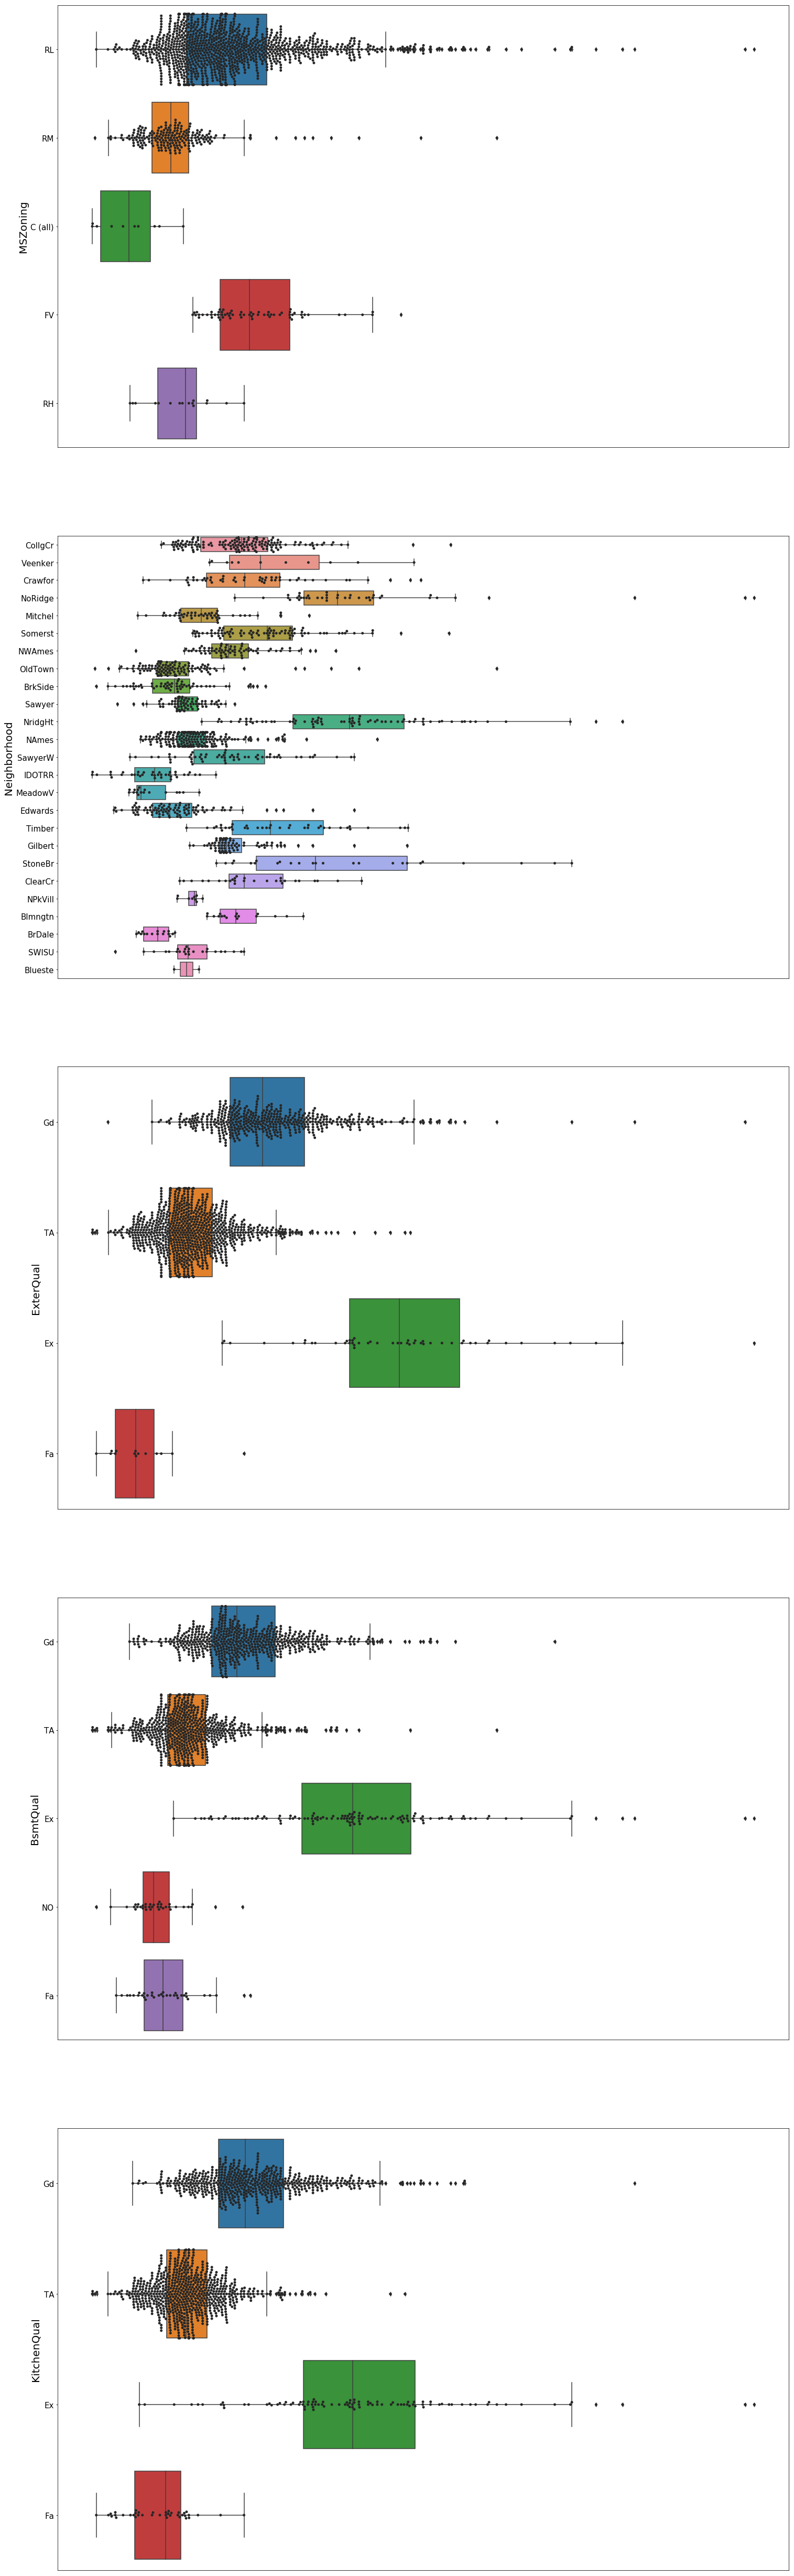

In [52]:
Box_Plot_function(df_train, categorical_list_seleceted, 5, 1)
#plt.savefig('Plots/box plot categorical.png'); 

In [53]:
def categorical_encoding(train_cat, target):

    # (1) ancoding for ['MSZoning', 'ExterQual', 'BsmtQual', 'KitchenQual']
    encode_map = {'MSZoning': {'C (all)': 1, 'RM': 2, 'RH': 2, 'RL': 3, 'FV': 4, 'NO':1}, # 'NO' is also added becasue it is necessary when the 'test.csv' has to encoded.
                  'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1},
                  'BsmtQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NO':1}, # 'NO' is also added becasue it is necessary when the 'test.csv' has to encoded.
                  'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'N0':1} # 'NO' is also added becasue it is necessary when the 'test.csv' has to encoded.
                 }

    train_cat.replace(encode_map, inplace=True) # use repalce function to apply the encoding

    # (2) For 'Neighborhood' Encoding we used another approach because there are 25 features.

    Neighborhood_category_2 = ['Timber', 'ClearCr', 'NWAmes', 'Somerst', 'Crawfor', 'Veenker', 'CollgCr','Blmngtn', 'Gilbert'] # features with higher influence
    Neighborhood_category_3 = ['StoneBr', 'NridgHt','NoRidge']#, 'SawyerW'] # features with medium influence

    train_cat['Neighborhood_Encoded'] = 1  # set all == 1 
    train_cat.loc[(train_cat['Neighborhood'].isin(Neighborhood_category_2)), 'Neighborhood_Encoded'] = 2  # change 1 with 2, if feature is in category_2 satisfied
    train_cat.loc[(train_cat['Neighborhood'].isin(Neighborhood_category_3)), 'Neighborhood_Encoded'] = 3  # change 1 with 3, if feauter is in category_3 satisfied 
    
    if target == 'yes':
        train_cat = train_cat[[f for f in train_cat.columns.tolist() if f != 'SalePrice_Ln'] + ['SalePrice_Ln']] # change column order, because we want SalePrice_Ln at the end
    else:
        train_cat = train_cat[[f for f in train_cat.columns.tolist()]]
    train_cat.drop(['Neighborhood'], axis=1, inplace = True) # drop the column with strings.
    train_cat.rename(columns={'Neighborhood_Encoded': 'Neighborhood'}, inplace=True)
    
    
    return(train_cat)


In [54]:
train = categorical_encoding(train, target= 'yes')

### 1.5.3 categorical features transformation

__As done for numerical features, also categorical encoded features can be transformed if a significant improvement on Skewness and Kurtosis is reported.__

In [55]:
# transform these four numerical features probabily we don't need.
def categorical_transformation(df):
    df['MSZoning_square'] =  np.square(df['MSZoning'])
    df.drop(['MSZoning'], axis=1, inplace = True)

    df['ExterQual_croot'] = np.cbrt(df['ExterQual'])
    df.drop(['ExterQual'], axis=1, inplace = True)

    df['KitchenQual_croot'] = np.log(df['KitchenQual'])
    df.drop(['KitchenQual'], axis=1, inplace = True)

    df['BsmtQual_root'] = np.sqrt(df['BsmtQual'])
    df.drop(['BsmtQual'], axis=1, inplace = True)

    return(df)

In [56]:
check_transformation(train, categorical_list_seleceted)

feature_name  Skewness  Kurtosis
0      MSZoning    -0.847     2.361
1  Neighborhood     0.774    -0.511
2     ExterQual     0.820     0.050
3      BsmtQual     0.133    -0.289
4   KitchenQual     0.384    -0.243

feature_name  Skewness  Kurtosis
0           MSZoning_Ln   -1.8953    6.0687
1         MSZoning_root   -1.3359    3.4194
2        MSZoning_croot   -1.5104    4.0789
3       MSZoning_square    0.1411    2.7121
4       Neighborhood_Ln    0.4153   -1.4098
5     Neighborhood_root    0.5680   -1.0405
6    Neighborhood_croot    0.5113   -1.1803
7   Neighborhood_square    1.3127    0.9917
8          ExterQual_Ln    0.2292    0.4340
9        ExterQual_root    0.5674   -0.1031
10      ExterQual_croot    0.4681   -0.0232
11     ExterQual_square    1.2850    1.5079
12          BsmtQual_Ln   -0.8090    1.1326
13        BsmtQual_root   -0.2899    0.0746
14       BsmtQual_croot   -0.4513    0.3411
15      BsmtQual_square    0.8006    0.2825
16       KitchenQual_Ln   -0.4668    0.9715
17     KitchenQual_root    0.0176   -0.0418
18    KitchenQual_croot   -0.1277    0.1850
19   KitchenQual_square    0.9700    0.6186

In [57]:
train = categorical_transformation(train)

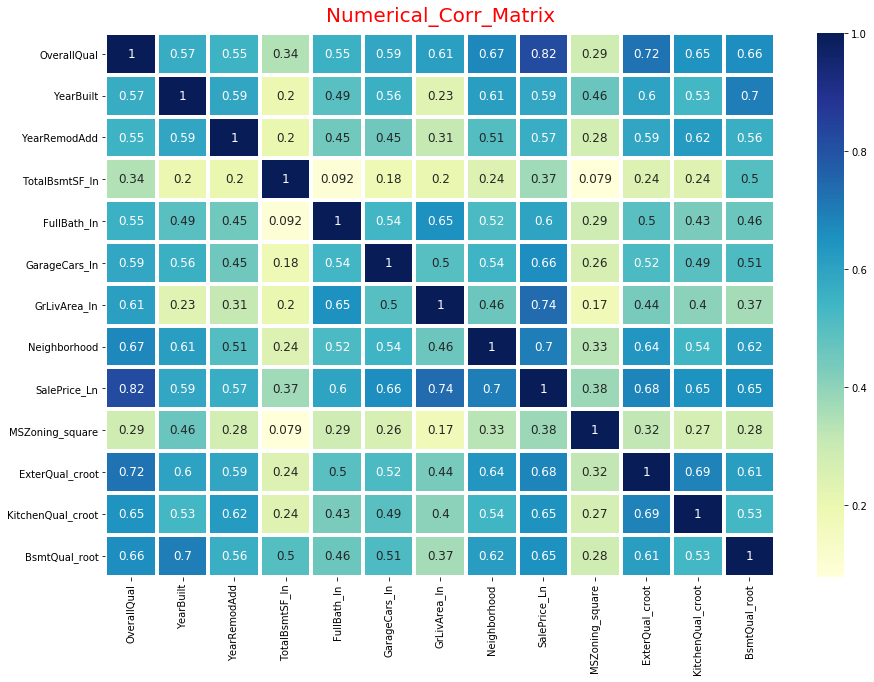

In [58]:
Corr_matrix_plot(train, size_num = 12, labelsize=10)
#plt.savefig('Plots/Correlation_matrix_categorical_and_numerical.png'); 

## 2 Standardize Data & Spliting in Train and Test sets 

In [59]:
df = train.copy()

df.drop(['SalePrice_Ln'], axis=1, inplace = True)

In [60]:
df.shape

(1458, 12)

### 2.1 Standardize

In [61]:
# Initialize instance of StandardScaler
scaler = StandardScaler()
# Fit and transform the data (excluded target feature)
df = scaler.fit_transform(df)

In [62]:
#df = pd.DataFrame(data = df, columns = [f for f in train.columns if f not in ['SalePrice', 'SalePrice_Ln']])
df = pd.DataFrame(data = df, columns = [f for f in train.columns if f not in ['SalePrice_Ln']])

### 2.2 Train and Test Splitting

In [63]:
# Split into train and test set.
X = df.copy()
y = train['SalePrice_Ln']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # we split the df in train(70%) and test(30%) set

### 2.3 Base Line

In [64]:
# The chosen base line is the median value.  
baseline_prediction = y_test.median() # compute baseline
absolute_error = abs((y_test - baseline_prediction).sum()) # compute absolute error
print('MAE baseline: ', round(np.mean(absolute_error), 2)) # compute mean absolute error

MAE baseline:  9.32


## 3 Hyperparameter tuning

In [65]:
classifiers = {
    
    'knn': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor(),
    'svm': SVR(),
    'rf': RandomForestRegressor(),
    'ada': AdaBoostRegressor()
              }

paramiters = {
    
    'knn':{'n_neighbors':[int(x) for x in np.linspace(1, 200, num = 5)],
           'weights':['uniform','distance']},
    
    'dtr': {
        'min_samples_split': [int(x) for x in np.linspace(2,40, num = 3)],
        'max_depth': [int(x) for x in np.linspace(10, 100, 4)],
        'min_samples_leaf': [int(x) for x in np.linspace(1, 5, 5)],
        'max_features' : ['log2','sqrt', 5, None]
    },
    
    'svm': [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [10, 100, 1000]}],
    
    'rf': {
        'n_estimators': [int(x) for x in np.linspace(100,200, num = 2)],
        'max_depth': [int(x) for x in np.linspace(10, 100, 2)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True]
    },
    
    'ada':{
        'n_estimators': [500,1000,2000],
        'learning_rate':[.001,0.01,.1]
    }
          }


In [66]:
GS_scores = {} # dictionary where are stored all the scores 
GS_best_scores = {} # dictionary where are stored only the best scores per each model
GS_best_paramiters = {} # dictionary where are stored only the best models
GS_best_estimators = {}# dictionary where are are stored best estimators (so we don't need to write them)
n = len(classifiers.keys())

for k in classifiers.keys():
    
    # we run up to all the models are tuned
    grid = GridSearchCV(
        classifiers[k],
        paramiters[k],
        cv = KFold(n_splits=10, random_state=25, shuffle=True),scoring='r2')

    grid.fit(X_train,y_train)
    #fitted_models['rf'] = grid
    GS_scores[k] = grid.cv_results_
    GS_best_scores[k] = grid.best_score_
    GS_best_paramiters[k] = grid.best_params_
    GS_best_estimators[k] = grid.best_estimator_
    n -=1
    print('GS for {} completed.. still {} models to be processed!'.format(k,n),end='\r')

In [67]:
GS_best_estimators

{'knn': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='distance'),
 'dtr': DecisionTreeRegressor(criterion='mse', max_depth=70, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=21, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'svm': SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'rf': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, ran

## 4. R^2, MAE, RMSE for tuned models

In [68]:
cross_validation = defaultdict()
r2_score_models_dict = defaultdict()
mae_models_dict = defaultdict()
rmsr_dict = defaultdict()


models = [k for k in GS_best_estimators.keys()] + ['mr']
    
for k in models: # now we call, one by one, all the models
    
    if k == 'mr':
        model_selected = linear_model.LinearRegression()
    else:
    
        model_selected = GS_best_estimators[k] # we select the model for the tuned models
    cross_validation_score = cross_val_score(model_selected, X_train, y_train, cv=10)
    model_selected.fit(X_train,y_train) # we fit the model with the train set
    y_prediction = model_selected.predict(X_test) # we make the prediction
    
    
    
    cross_validation[k] = cross_validation_score.tolist() # store cross validation scores
    r2_score_models_dict[k] = r2_score(y_test,y_prediction) # store r2
    mae_models_dict[k] = mean_absolute_error(y_test, y_prediction) # store mean absolute erro
    rmsr_dict[k] = np.sqrt(mean_squared_error(y_test, y_prediction)) # store root mean square error

## 5. Neural Network

### 5.1 Tuning Neural Network Paramiters

In [69]:
layers = [2, 3, 4, 5] #array of layers
neurones = [200, 225, 250, 275] #array of neurones
epch = [10000, 15000, 20000, 25000] #array of epoch

NN_accuracy = defaultdict(list) #dictionary where we store results

#Tuning the parameters

#to loop the layers array
for x in layers:
            
    #create the model when number of layers equals to 2
    if(x == 2):
        #create the model with 200 neurones, 10000 epoches and 2 layers
        reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (neurones[0],neurones[0]),
                           max_iter=epch[0],learning_rate='adaptive',
                           tol=0.0,warm_start=True,solver='adam')
        
    #create the model when number of layers equals to 3       
    if(x == 3):
        #create the model with 200 neurones, 10000 epoches and 3 layers
        reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (neurones[0],neurones[0], neurones[0]),
                           max_iter=epch[0],learning_rate='adaptive',
                           tol=0.0,warm_start=True,solver='adam')
      
    #create the model when number of layers equals to 4 
    if(x == 4):
        #create the model with 200 neurones, 10000 epoches and 4 layers
        reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (neurones[0],neurones[0],neurones[0],neurones[0]),
                            max_iter=epch[0],learning_rate='adaptive',
                            tol=0.0,warm_start=True,solver='adam')
            
    #create the model when number of layers equals to 5
    if(x == 5):
        #create the model with 200 neurones, 10000 epoches and 5 layers
        reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (neurones[0],neurones[0],neurones[0],neurones[0],neurones[0]),
                            max_iter=epch[0],learning_rate='adaptive',
                            tol=0.0,warm_start=True,solver='adam')

    #applying 10 fold cross validation
    tst = cross_val_score(reg, X_train, y_train, cv = 10)

    #save results to the NN_accuracy
    NN_accuracy["acc_layer"].append(tst)




#check the accuracy by changing number of neurones
for x in neurones:
    
    #create the model 10000 epoches and 2 layers with number of neurones change with each iteration according to the 'neurones' array
    reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (x,x),
                       max_iter=epch[0],learning_rate='adaptive',
                       tol=0.0,warm_start=True,solver='adam')
    
    #applying 10 fold cross validation
    tst = cross_val_score(reg, X_train, y_train, cv = 10)

    #save results to the NN_accuracy
    NN_accuracy["acc_neurones"].append(tst)


#check the accuracy by changing number of iterations
for x in epch:
        
    #create the model 200 neurones and 2 layers with number of epoches change with each iteration according to the 'epch' array
    reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (100,100),
                       max_iter=x,learning_rate='adaptive',
                       tol=0.0,warm_start=True,solver='adam')
        
    #applying 10 fold cross validation
    tst = cross_val_score(reg, X_train, y_train, cv = 10)
    
    #save results to the NN_accuracy
    NN_accuracy["acc_epoch"].append(tst)

In [70]:
#Array to store the mean results of each cross validation
nn_parameters = defaultdict(list)

#loop keys of the NN_accuracy
for k in NN_accuracy.keys():
    
    for v in NN_accuracy[k]:
        #calculate the mean for each section of tuning parameters
        nn_parameters[k].append(np.mean(v))

In [71]:

#create the model for the best chosen parameters(no-of-layers - 2, neurones - 200, epoches - 10000)
reg = MLPRegressor(activation = 'relu',hidden_layer_sizes = (200,200),
                       max_iter=10000,learning_rate='adaptive',
                       tol=0.0,warm_start=True,solver='adam')
        
#applying 10 fold cross validation
cross_validation['nn'] = cross_val_score(reg, X_train, y_train, cv = 10).tolist() # save cross validation results for the selected model

### 5.2 R^2, mae, rmse

In [72]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

r2_score_models_dict['nn'] = r2_score(y_test, y_pred) # store r^2 into 'r2_score_models_dict'
mae_models_dict['nn'] = mean_absolute_error(y_test, y_pred) # store mae into 'mae_models_dict'
rmsr_dict['nn'] = np.sqrt(mean_squared_error(y_test, y_pred)) # store rmse into 'rmsr_dict'

## 6. Plot Results

__Convert R^2, mean_absolute_error and root_mean_square_error into DataFrame because we need for histograms__

In [73]:
# DataFrame where we there are all the results:
df_results = pd.DataFrame.from_records([r2_score_models_dict, mae_models_dict, rmsr_dict] +
                                       [{k: np.square(v) for k,v in rmsr_dict.items()}],
                                       index=['r2', 'mae','rmse', 'mse']).T.sort_values(by= 'rmse', ascending=False).reset_index().rename(columns={'index':'models'})

### 6.1 Box-Plot models comparison

In [74]:
for k,v in cross_validation.items():
    print(k, np.mean(v))

knn 0.799153859816432
dtr 0.7759645375912068
svm 0.8698274398149968
rf 0.8583399810590663
ada 0.7920443420034919
mr 0.8420360543714812
nn 0.540431532929866


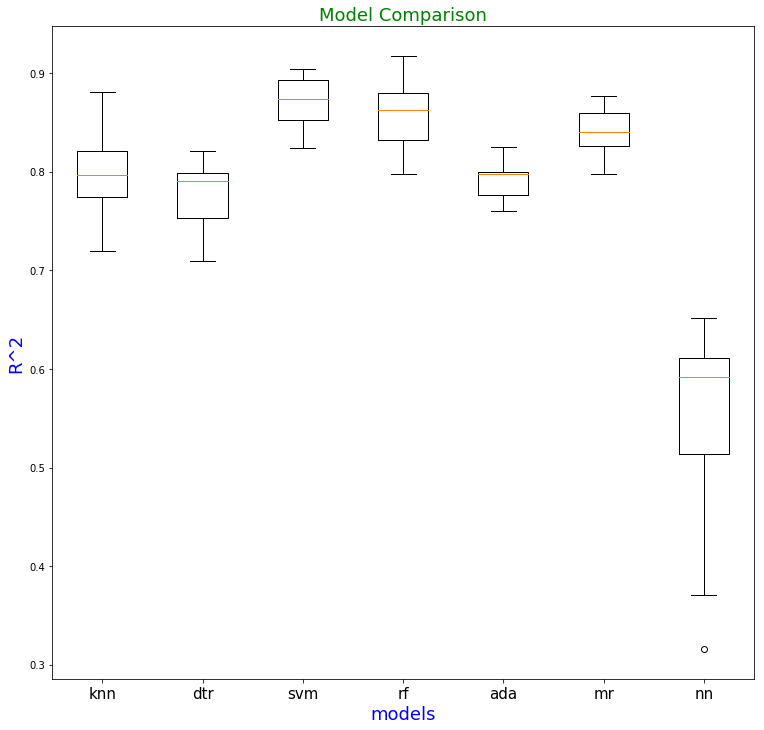

In [75]:
labels, data = [*zip(*cross_validation.items())] 
labels, data = cross_validation.keys(), cross_validation.values()

plt.figure(figsize = (15,12))
plt.subplots_adjust(left=0.25)
plt.boxplot(data)

plt.title('Model Comparison', fontsize=18, color = 'green')
plt.xticks(range(1, len(labels) + 1), labels, fontsize = 15)
plt.xlabel('models', fontsize=18).set_color("Blue")
plt.ylabel('R^2', fontsize=18).set_color("Blue")

plt.savefig('modelsR2_strange2.png')
plt.show()

### 6.2 Regression matrics plots

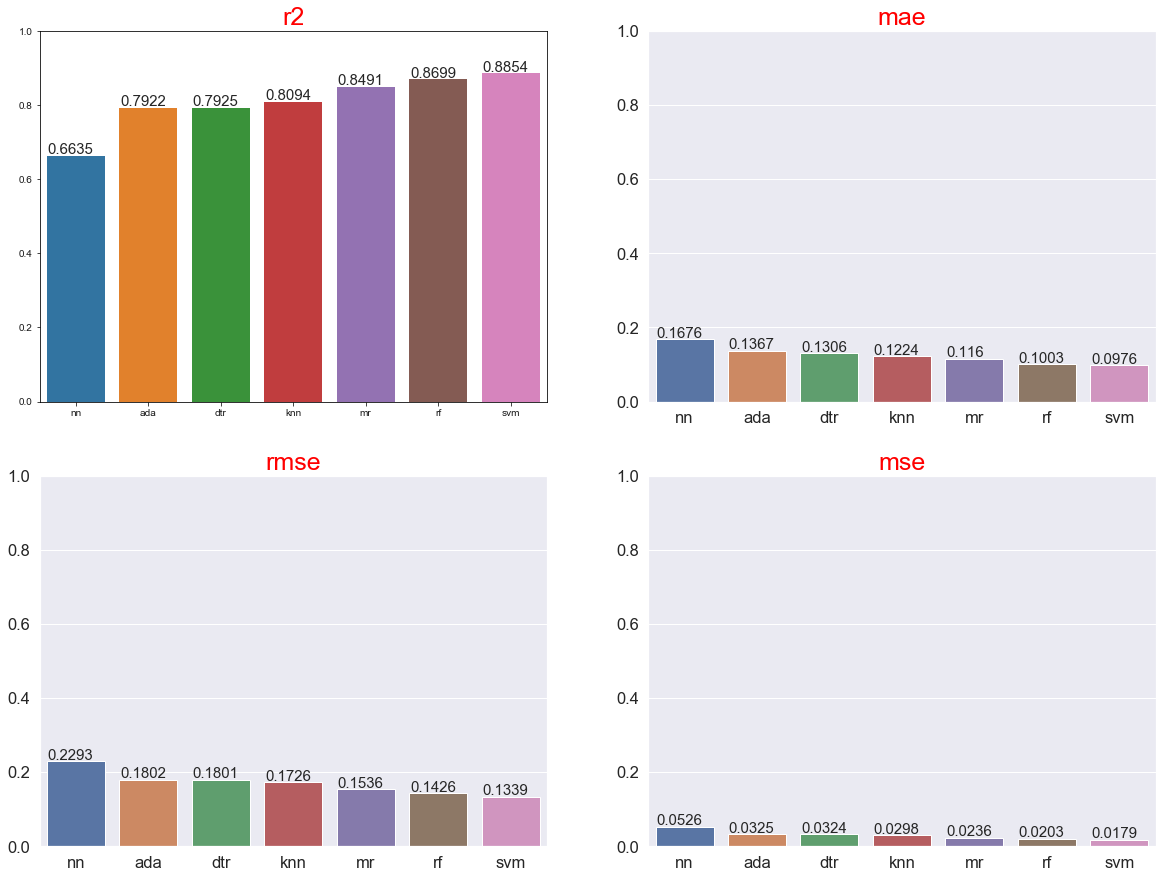

In [76]:
fig = plt.figure(figsize=(20,15))

for n,k in enumerate([l for l in df_results.columns.tolist() if l != 'models']):
    
    ax = fig.add_subplot(2, 2, (n+1))
    sns.barplot(x = 'models', y = k,data = df_results)
    ax.set_title(k, color='Red', fontsize=25)
    #ax.xaxis.label.set_size(25)
    ax.set_ylim(0, 1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    #plt.setp(ax,yticks=[0,5])
    #ax.tick_params(axis='y', which='minor', labelsize=15)
    #sns.set(font_scale = [1 if n in [0,6] else 1.5][0])
    sns.set(font_scale = 1.5)
   
  
    
    for e,p in enumerate(ax.patches):
        values = str(round(df_results[k][e], 4))
        x = p.get_x() + 0.01 # get x coordinate
        y = p.get_y() + p.get_height() + 0.005 # get y coordinate
        ax.annotate(values, (x, y),fontsize=15)
    
plt.savefig('regressionmatric2.png')

In [77]:
df_results

models        r2       mae      rmse       mse
0     nn  0.663472  0.167586  0.229336  0.052595
1    ada  0.792200  0.136665  0.180212  0.032476
2    dtr  0.792471  0.130568  0.180095  0.032434
3    knn  0.809433  0.122352  0.172578  0.029783
4     mr  0.849114  0.115977  0.153563  0.023581
5     rf  0.869909  0.100260  0.142589  0.020331
6    svm  0.885355  0.097623  0.133856  0.017918

## 7. Test Cleaning and Kaggle Submission

### 7.1 Import and prepare the test.csv by calling the predefined functions:
1. 'fix_nan_function'
- 'categorical_encoding'
- 'categorical_transformation'
- 'numerical_transformation'

In [78]:
df_test = pd.read_csv("test.csv")

In [79]:
df_test.shape

(1459, 80)

In [80]:
# data preparation

test = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'FullBath', 'GarageCars', 'GrLivArea', 'Neighborhood', 'MSZoning', 'ExterQual',
       'KitchenQual', 'BsmtQual']] # select all the most relevant features

test = fix_nan_function(test,
                        ['BsmtQual', 'MSZoning', 'KitchenQual', 'GarageCars', 'TotalBsmtSF'],
                        ['GarageCars', 'TotalBsmtSF']) # fix the 'NaN' values by calling the predefined 'fix_nan_function'

# apply encoding using predefined function
test = categorical_encoding(test, target='no') 
mapping = {'NO': 1}
test.replace(mapping, inplace=True)

test = categorical_transformation(test) # categorical transforamtion
test = numerical_transformation(test) # numerical transforamtion

In [81]:
test.shape

(1459, 12)

In [82]:
# standardize test data
scaler = StandardScaler()
test_transformed = scaler.fit_transform(test)

### 7.2 Prediction by using the best model, Random Forest.

In [83]:
predictions = GS_best_estimators['rf'].predict(test_transformed)

### 7.3 Store predictions into .csv file and upload on Kaggle platform 

In [84]:
df_predictions = pd.DataFrame()
df_predictions['Id'] = df_test['Id']
df_predictions['SalePrice'] = np.exp(predictions)

#pred_df.head(100)
#df_predictions.to_csv('submission_rf.csv',index=False)